In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
# import seaborn as sns
import os.path as path
import os
# import matplotlib
# import matplotlib.font_manager
# import matplotlib.pyplot as plt # graphs plotting
# import Bio
from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# from matplotlib import rc
# # for Arial typefont
# matplotlib.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean

import seaborn as sns

import itertools
from itertools import product

## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# matplotlib.rcParams['mathtext.fontset'] = 'cm'

## for LaTeX typefont
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'

## for another LaTeX typefont
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# rc('text', usetex = True)

print("done")

done


In [4]:
sequences = np.load('/Users/pchourasia1/Desktop/Host_Classification/Data Processing/unaligned_sequences.npy',allow_pickle=True)
attributes = np.load('/Users/pchourasia1/Desktop/Host_Classification/Data Processing/attributes.npy',allow_pickle=True)

In [5]:
host_names = attributes[:]

In [6]:
len(host_names[0]), len(sequences[0])

(11, 1270)

In [7]:
np.unique(sequences[0])

array(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y'], dtype='<U1')

# Kmers function

In [8]:
def build_minimizer(sequence, ksize, m_size):
    # https://homolog.us/blogs/bioinfo/2017/10/25/intro-minimizer/
#     seq="ATGCGATATCGTAGGCGTCGATGGAGAGCTAGATCGATCGATCTAAATCCCGATCGATTCCGAGCGCGATCAAAGCGCGATAGGCTAGCTAAAGCTAGCA"
#     sequence = seq[:]

#     asd = str(sequence)
#     asd = np.array2string(sequence)
    
    string_parsing = []
    for ind_test in range(len(sequence)):
        string_parsing.append(str(sequence[ind_test]))
    
    asd = str(string_parsing)
    aa_lst_1 = asd.replace(",","")
    aa_lst_2 = aa_lst_1.replace("[","")
    aa_lst_3 = aa_lst_2.replace("\"","")
    aa_lst_4 = aa_lst_3.replace("]","")
    aa_lst_5 = aa_lst_4.replace("'","")
    aa_lst_6 = aa_lst_5.replace(" ","")
    aa_lst_6

#     print(aa_lst_6)
    seq = aa_lst_6[:]
    rev=seq[::-1]
    
    Kmer=ksize
    M=m_size
    L=len(seq)

    minimizers = []
    k_mers_final = []
    for i in range(0, L-Kmer+1):

            sub_f=seq[i:i+Kmer]
            sub_r=rev[L-Kmer-i:L-i]

            min="ZZZZZZZZZZZZZ"
            for j in range(0, Kmer-M+1):
                    sub2=sub_f[j:j+M]
                    if sub2 < min:
                            min=sub2
                    sub2=sub_r[j:j+M]
                    if sub2 < min:
                            min=sub2
            minimizers.append(min)
            k_mers_final.append(sub_f)
#             print(sub_f,min)

#     print("unique minimizers = ",len(np.unique(minimizers)))
#     print("unique kmers = ",len(np.unique(k_mers_final)))

    return minimizers

In [9]:
k_size_val = 10
m_size_val = 3

protein_kmers_list = []
for protein_kmers in range(len(sequences)):
#     print(protein_kmers, "/",len(sequences))
    k_mers_vals = build_minimizer(sequences[protein_kmers],k_size_val, m_size_val)

    # str(k_mers_vals[0])
    k_mers_list = []
    for mers_ind in range(len(k_mers_vals)):
        k_mers_list.append(str(k_mers_vals[mers_ind]))
        
    protein_kmers_list.append(k_mers_list)

In [10]:
seq_kmers_final = []
for i in range(len(protein_kmers_list)):
    tmp = protein_kmers_list[i]
    tmp_seq = []
    for j in range(len(protein_kmers_list[i])):
        aa = tmp[j]
        aa_lst = str(list(aa))
        aa_lst_1 = aa_lst.replace(",","")
        aa_lst_2 = aa_lst_1.replace("[","")
        aa_lst_3 = aa_lst_2.replace("\"","")
        aa_lst_4 = aa_lst_3.replace("]","")
        aa_lst_5 = aa_lst_4.replace("'","")
        aa_lst_6 = aa_lst_5.replace(" ","")
        tmp_seq.append(aa_lst_6)
    seq_kmers_final.append(tmp_seq)

In [11]:
len(seq_kmers_final[0])

1261

In [12]:
unique_seq_kmers_final_list = [''.join(c) for c in product('ABCDEFGHIJKLMNPQRSTVWXYZ-', repeat=3)]  

In [13]:
len(unique_seq_kmers_final_list)

15625

In [14]:
frequency_vector = []
#cnt_check2 = 0
for ii in range(len(seq_kmers_final)):
    seq_tmp = seq_kmers_final[ii]
    listofzeros = [0] * len(unique_seq_kmers_final_list)
    for j in range(len(seq_tmp)):
        ind_tmp = unique_seq_kmers_final_list.index(seq_tmp[j])
        listofzeros[ind_tmp] = listofzeros[ind_tmp] + 1
    frequency_vector.append(listofzeros)

In [15]:
unique_hst = list(np.unique(host_names))
len(unique_hst)

23

In [16]:
int_hosts = []
for ind_unique in range(len(host_names)):
    variant_tmp = host_names[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

Attribute data preprocessing Done


In [17]:
len(frequency_vector[0])

15625

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt # graphs plotting
import matplotlib.cm as cm
import seaborn as sns

# We embed all our sequences into 2D vectors with help of TSNE
X_embedded_orig = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(frequency_vector)
# X_embedded = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(Ridge_Regression_data)

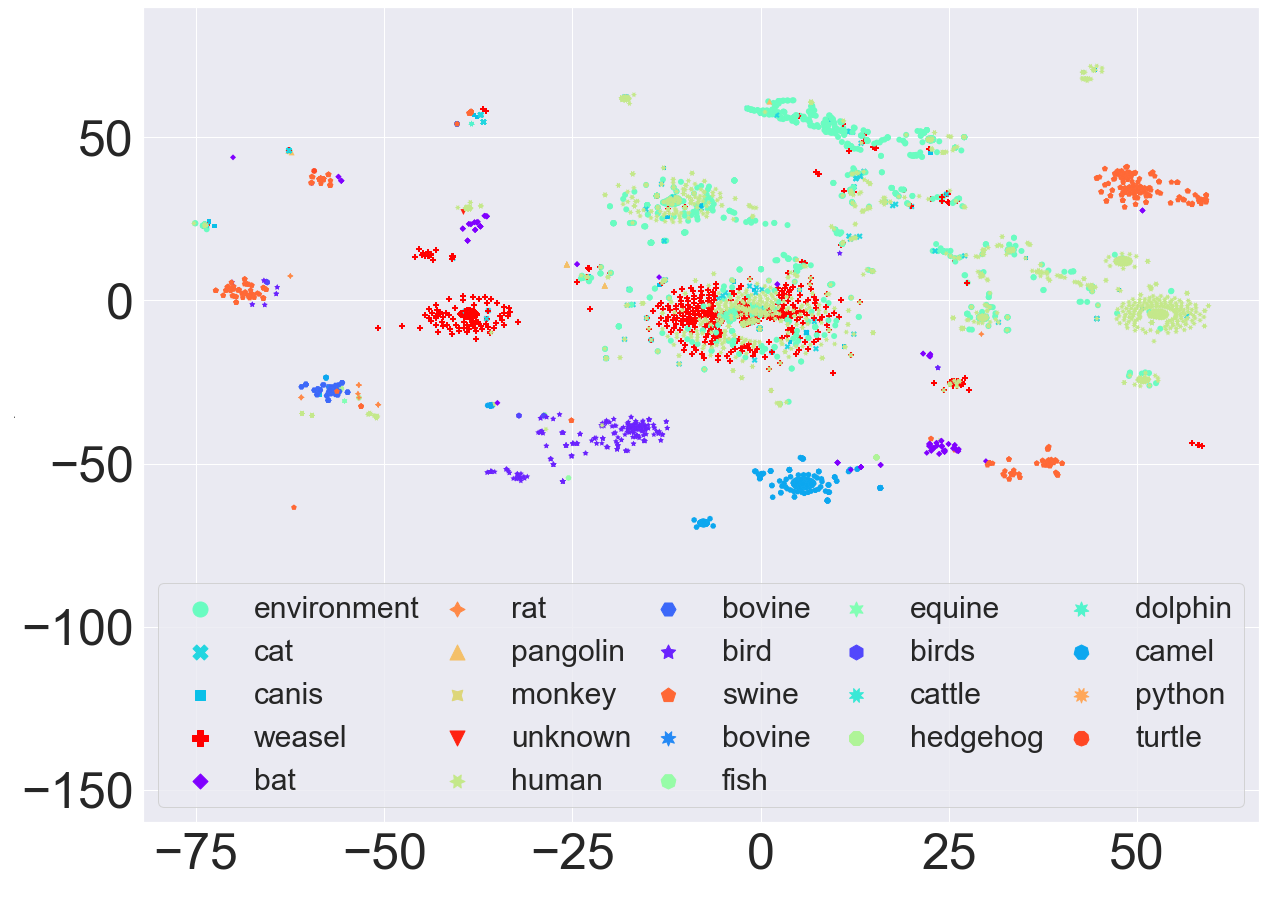

In [181]:
# az = host_names_new
az = attributes[:]
# az = month_names_few_final
# X_embedded_orig_final2 = np.array(X_embedded)
X_embedded_orig_final2 = np.array(X_embedded_orig)

colors = cm.rainbow(np.linspace(0, 1, len(np.unique(az))))
len(np.unique(az))

hst = np.unique(az)
order_top_hosts =  az

colors_top_hosts = {hst[0] : colors[0], hst[1] : colors[1],
                      hst[2] : colors[2], hst[3]: colors[3],  
                      hst[4] : colors[4],
hst[5]:colors[5],
hst[6]:colors[6],
hst[7]:colors[7],
hst[8]:colors[8],
hst[9]:colors[9],
hst[10]:colors[10],
hst[11]:colors[11],
hst[12]:colors[12],
hst[13]:colors[13],
hst[14]:colors[14],
hst[15]:colors[15],
hst[16]:colors[16],
hst[17]:colors[17],
hst[18]:colors[18],
hst[19]:colors[19],
hst[20]:colors[20],
hst[21]:colors[21],
hst[22]:colors[22]
}


data_frame_top_hosts = pd.DataFrame({' ': 
                                   np.array(X_embedded_orig_final2[:,0]), 
                           '.': np.array(X_embedded_orig_final2[:,1]), 
                           'Variants:': az})

sns.set(rc={'figure.figsize':(20,15)})

sns.scatterplot(x = ' ', 
            y = '.', 
            hue = 'Variants:', 
            hue_order = order_top_hosts,
#             markers = ordered_markers_top_hosts,
            palette = colors_top_hosts,
            data = data_frame_top_hosts,           
#             legend = 'full',
#             ax = ax12,
#             s = 100,
            linewidth=0.01,
            style = 'Variants:')
plt.ylim(-160, 90)
# plt.xlim(-80, 80)
# plt.xlabel("Steps Taken Per Day", fontsize=14)
# plt.ylabel("Calories Burned Per Day", fontsize=14)
plt.tick_params(labelsize=50)
# plt.legend(fontsize=0)
# plt.legend(fontsize=30, mode = "expand", ncol = 5)
# lgnd = plt.legend(loc="lower left", numpoints=1, fontsize=10)

lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=30, mode = "expand", ncol = 5)
for handle in lgnd.legendHandles:
    handle.set_sizes([226.0])

write_path = "host_kmers_Minimizer_tnse_plot.png"

plt.savefig(write_path)

# Classification Functions

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# a = np.random.random((16, 16))
# plt.imshow(a, cmap='hot', interpolation='nearest')
# plt.show()




In [42]:
# In[4]
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
    
    
    check = pd.DataFrame(roc_auc_dict.items())
    return mean(check)

def svm_fun_kernel(X_train,y_train,X_test,y_test,kernel_mat):

#     clf = svm.SVC()
    clf = svm.SVC(kernel=kernel_mat)
    
    #Train the model using the training sets
    clf.fit(kernel_mat, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    svm_acc = metrics.accuracy_score(y_test, y_pred)
#     print("SVM Accuracy:",svm_acc)
    
    svm_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("SVM Precision:",svm_prec)
    
    svm_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("SVM Recall:",svm_recall)

    svm_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("SVM F1 Weighted:",svm_f1_weighted)
    
    svm_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("SVM F1 macro:",svm_f1_macro)
    
    svm_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("SVM F1 micro:",svm_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix SVM : \n", confuse)
    print("SVM Kernel Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
#    print(macro_roc_auc_ovo[1])
    check = [svm_acc,svm_prec,svm_recall,svm_f1_weighted,svm_f1_macro,svm_f1_micro,macro_roc_auc_ovo[1]]
    a = confuse[:]
    sns.heatmap(a, cmap="Blues")
    plt.show()
#     plt.imshow(a, cmap='hot', interpolation='nearest', cmap = 'Greens')
#     plt.show()
    return(check)
    
# In[5]
##########################  SVM Classifier  ################################
def svm_fun(X_train,y_train,X_test,y_test):
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    svm_acc = metrics.accuracy_score(y_test, y_pred)
#     print("SVM Accuracy:",svm_acc)
    
    svm_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("SVM Precision:",svm_prec)
    
    svm_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("SVM Recall:",svm_recall)

    svm_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("SVM F1 Weighted:",svm_f1_weighted)
    
    svm_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("SVM F1 macro:",svm_f1_macro)
    
    svm_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("SVM F1 micro:",svm_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix SVM : \n", confuse)
    print("SVM Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
#    print(macro_roc_auc_ovo[1])
    check = [svm_acc,svm_prec,svm_recall,svm_f1_weighted,svm_f1_macro,svm_f1_micro,macro_roc_auc_ovo[1]]
    a = confuse[:]
#     plt.imshow(a, cmap='hot', interpolation='nearest' , cmap = 'Greens')
#     plt.show()
    sns.heatmap(a, cmap="Blues")
    plt.show()
    return(check)
    


# In[5]
##########################  NB Classifier  ################################
def gaus_nb_fun(X_train,y_train,X_test,y_test):
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)


    NB_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Gaussian NB Accuracy:",NB_acc)

    NB_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB Precision:",NB_prec)
    
    NB_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB Recall:",NB_recall)
    
    NB_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB F1 weighted:",NB_f1_weighted)
    
    NB_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Gaussian NB F1 macro:",NB_f1_macro)
    
    NB_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Gaussian NB F1 micro:",NB_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix NB : \n", confuse)
    print("NB Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    check = [NB_acc,NB_prec,NB_recall,NB_f1_weighted,NB_f1_macro,NB_f1_micro,macro_roc_auc_ovo[1]]
    a = confuse[:]
#     plt.imshow(a, cmap='hot', interpolation='nearest' , cmap = 'Greens')
#     plt.show()
    sns.heatmap(a, cmap="Blues")
    plt.show()
    return(check)

# In[5]
##########################  MLP Classifier  ################################
def mlp_fun(X_train,y_train,X_test,y_test):
    # Feature scaling
    scaler = StandardScaler()  
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)  
    X_test_2 = scaler.transform(X_test)


    # Finally for the MLP- Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
    mlp.fit(X_train, y_train)


    y_pred = mlp.predict(X_test_2)
    
    MLP_acc = metrics.accuracy_score(y_test, y_pred)
#     print("MLP Accuracy:",MLP_acc)
    
    MLP_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("MLP Precision:",MLP_prec)
    
    MLP_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("MLP Recall:",MLP_recall)
    
    MLP_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("MLP F1:",MLP_f1_weighted)
    
    MLP_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("MLP F1:",MLP_f1_macro)
    
    MLP_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("MLP F1:",MLP_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix MLP : \n", confuse)
    print("MLP Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [MLP_acc,MLP_prec,MLP_recall,MLP_f1_weighted,MLP_f1_macro,MLP_f1_micro,macro_roc_auc_ovo[1]]
    a = confuse[:]
#     plt.imshow(a, cmap='hot', interpolation='nearest' , cmap = 'Greens')
#     plt.show()
    sns.heatmap(a, cmap="Blues")
    plt.show()
    return(check)

# In[5]
##########################  knn Classifier  ################################
def knn_fun(X_train,y_train,X_test,y_test):
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    knn_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Knn Accuracy:",knn_acc)
    
    knn_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Knn Precision:",knn_prec)
    
    knn_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Knn Recall:",knn_recall)
    
    knn_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Knn F1 weighted:",knn_f1_weighted)
    
    knn_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Knn F1 macro:",knn_f1_macro)
    
    knn_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Knn F1 micro:",knn_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix KNN : \n", confuse)
    print("KNN Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [knn_acc,knn_prec,knn_recall,knn_f1_weighted,knn_f1_macro,knn_f1_micro,macro_roc_auc_ovo[1]]
    a = confuse[:]
#     plt.imshow(a, cmap='hot', interpolation='nearest' , cmap = 'Greens')
    sns.heatmap(a, cmap="Blues")
    plt.show()
    return(check)

# In[5]
##########################  Random Forest Classifier  ################################
def rf_fun(X_train,y_train,X_test,y_test):
    # Import the model we are using
    from sklearn.ensemble import RandomForestClassifier
    # Instantiate model with 1000 decision trees
    rf = RandomForestClassifier(n_estimators = 100)
    # Train the model on training data
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    fr_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Random Forest Accuracy:",fr_acc)
    
    fr_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Random Forest Precision:",fr_prec)
    
    fr_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Random Forest Recall:",fr_recall)
    
    fr_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Random Forest F1 weighted:",fr_f1_weighted)
    
    fr_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Random Forest F1 macro:",fr_f1_macro)
    
    fr_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Random Forest F1 micro:",fr_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix RF : \n", confuse)
    print("RF Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [fr_acc,fr_prec,fr_recall,fr_f1_weighted,fr_f1_macro,fr_f1_micro,macro_roc_auc_ovo[1]]
    a = confuse[:]
#     plt.imshow(a, cmap='hot', interpolation='nearest' , cmap = 'Greens')
    sns.heatmap(a, cmap="Blues")
    plt.show()
    return(check)

# In[5]
    ##########################  Logistic Regression Classifier  ################################
def lr_fun(X_train,y_train,X_test,y_test):

    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    LR_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Logistic Regression Accuracy:",LR_acc)
    
    LR_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Precision:",LR_prec)
    
    LR_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Recall:",LR_recall)
    
    LR_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression F1 weighted:",LR_f1_weighted)
    
    LR_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Logistic Regression F1 macro:",LR_f1_macro)
    
    LR_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Logistic Regression F1 micro:",LR_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix LR : \n", confuse)
    print("LR Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [LR_acc,LR_prec,LR_recall,LR_f1_weighted,LR_f1_macro,LR_f1_micro,macro_roc_auc_ovo[1]]
    a = confuse[:]
    sns.heatmap(a, cmap="Blues")
    plt.show()
    return(check)


def fun_decision_tree(X_train,y_train,X_test,y_test):
    from sklearn import tree
    
    clf = tree.DecisionTreeClassifier()    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    dt_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Logistic Regression Accuracy:",LR_acc)
    
    dt_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Precision:",LR_prec)
    
    dt_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Recall:",LR_recall)
    
    dt_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression F1 weighted:",LR_f1_weighted)
    
    dt_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Logistic Regression F1 macro:",LR_f1_macro)
    
    dt_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Logistic Regression F1 micro:",LR_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    a = confuse[:]
    print("Confusion Matrix DT : \n", confuse)
    print("DT Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [dt_acc,dt_prec,dt_recall,dt_f1_weighted,dt_f1_macro,dt_f1_micro,macro_roc_auc_ovo[1]]
    sns.heatmap(a, cmap="Blues")
    plt.show()
    return(check)


In [43]:
unique_hst = list(np.unique(host_names))
len(unique_hst)

23

In [44]:

int_hosts = []
for ind_unique in range(len(host_names)):
    variant_tmp = host_names[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

Attribute data preprocessing Done


In [45]:
X = np.array(frequency_vector)
y = np.array(int_hosts)

X_orig = np.array(frequency_vector)

In [46]:
X.shape, len(y), len(X[0])

((5558, 15625), 5558, 15625)

## Boruta

In [47]:
### make X_shadow by randomly permuting each column of X
X_df = pd.DataFrame(X_orig)
X_df.columns = ["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10","c11","c12","c13","c14","c15","c16","c17","c18","c19","c20","c21","c22","c23","c24","c25","c26","c27","c28","c29","c30","c31","c32","c33","c34","c35","c36","c37","c38","c39","c40","c41","c42","c43","c44","c45","c46","c47","c48","c49","c50","c51","c52","c53","c54","c55","c56","c57","c58","c59","c60","c61","c62","c63","c64","c65","c66","c67","c68","c69","c70","c71","c72","c73","c74","c75","c76","c77","c78","c79","c80","c81","c82","c83","c84","c85","c86","c87","c88","c89","c90","c91","c92","c93","c94","c95","c96","c97","c98","c99","c100","c101","c102","c103","c104","c105","c106","c107","c108","c109","c110","c111","c112","c113","c114","c115","c116","c117","c118","c119","c120","c121","c122","c123","c124","c125","c126","c127","c128","c129","c130","c131","c132","c133","c134","c135","c136","c137","c138","c139","c140","c141","c142","c143","c144","c145","c146","c147","c148","c149","c150","c151","c152","c153","c154","c155","c156","c157","c158","c159","c160","c161","c162","c163","c164","c165","c166","c167","c168","c169","c170","c171","c172","c173","c174","c175","c176","c177","c178","c179","c180","c181","c182","c183","c184","c185","c186","c187","c188","c189","c190","c191","c192","c193","c194","c195","c196","c197","c198","c199","c200","c201","c202","c203","c204","c205","c206","c207","c208","c209","c210","c211","c212","c213","c214","c215","c216","c217","c218","c219","c220","c221","c222","c223","c224","c225","c226","c227","c228","c229","c230","c231","c232","c233","c234","c235","c236","c237","c238","c239","c240","c241","c242","c243","c244","c245","c246","c247","c248","c249","c250","c251","c252","c253","c254","c255","c256","c257","c258","c259","c260","c261","c262","c263","c264","c265","c266","c267","c268","c269","c270","c271","c272","c273","c274","c275","c276","c277","c278","c279","c280","c281","c282","c283","c284","c285","c286","c287","c288","c289","c290","c291","c292","c293","c294","c295","c296","c297","c298","c299","c300","c301","c302","c303","c304","c305","c306","c307","c308","c309","c310","c311","c312","c313","c314","c315","c316","c317","c318","c319","c320","c321","c322","c323","c324","c325","c326","c327","c328","c329","c330","c331","c332","c333","c334","c335","c336","c337","c338","c339","c340","c341","c342","c343","c344","c345","c346","c347","c348","c349","c350","c351","c352","c353","c354","c355","c356","c357","c358","c359","c360","c361","c362","c363","c364","c365","c366","c367","c368","c369","c370","c371","c372","c373","c374","c375","c376","c377","c378","c379","c380","c381","c382","c383","c384","c385","c386","c387","c388","c389","c390","c391","c392","c393","c394","c395","c396","c397","c398","c399","c400","c401","c402","c403","c404","c405","c406","c407","c408","c409","c410","c411","c412","c413","c414","c415","c416","c417","c418","c419","c420","c421","c422","c423","c424","c425","c426","c427","c428","c429","c430","c431","c432","c433","c434","c435","c436","c437","c438","c439","c440","c441","c442","c443","c444","c445","c446","c447","c448","c449","c450","c451","c452","c453","c454","c455","c456","c457","c458","c459","c460","c461","c462","c463","c464","c465","c466","c467","c468","c469","c470","c471","c472","c473","c474","c475","c476","c477","c478","c479","c480","c481","c482","c483","c484","c485","c486","c487","c488","c489","c490","c491","c492","c493","c494","c495","c496","c497","c498","c499","c500","c501","c502","c503","c504","c505","c506","c507","c508","c509","c510","c511","c512","c513","c514","c515","c516","c517","c518","c519","c520","c521","c522","c523","c524","c525","c526","c527","c528","c529","c530","c531","c532","c533","c534","c535","c536","c537","c538","c539","c540","c541","c542","c543","c544","c545","c546","c547","c548","c549","c550","c551","c552","c553","c554","c555","c556","c557","c558","c559","c560","c561","c562","c563","c564","c565","c566","c567","c568","c569","c570","c571","c572","c573","c574","c575","c576","c577","c578","c579","c580","c581","c582","c583","c584","c585","c586","c587","c588","c589","c590","c591","c592","c593","c594","c595","c596","c597","c598","c599","c600","c601","c602","c603","c604","c605","c606","c607","c608","c609","c610","c611","c612","c613","c614","c615","c616","c617","c618","c619","c620","c621","c622","c623","c624","c625","c626","c627","c628","c629","c630","c631","c632","c633","c634","c635","c636","c637","c638","c639","c640","c641","c642","c643","c644","c645","c646","c647","c648","c649","c650","c651","c652","c653","c654","c655","c656","c657","c658","c659","c660","c661","c662","c663","c664","c665","c666","c667","c668","c669","c670","c671","c672","c673","c674","c675","c676","c677","c678","c679","c680","c681","c682","c683","c684","c685","c686","c687","c688","c689","c690","c691","c692","c693","c694","c695","c696","c697","c698","c699","c700","c701","c702","c703","c704","c705","c706","c707","c708","c709","c710","c711","c712","c713","c714","c715","c716","c717","c718","c719","c720","c721","c722","c723","c724","c725","c726","c727","c728","c729","c730","c731","c732","c733","c734","c735","c736","c737","c738","c739","c740","c741","c742","c743","c744","c745","c746","c747","c748","c749","c750","c751","c752","c753","c754","c755","c756","c757","c758","c759","c760","c761","c762","c763","c764","c765","c766","c767","c768","c769","c770","c771","c772","c773","c774","c775","c776","c777","c778","c779","c780","c781","c782","c783","c784","c785","c786","c787","c788","c789","c790","c791","c792","c793","c794","c795","c796","c797","c798","c799","c800","c801","c802","c803","c804","c805","c806","c807","c808","c809","c810","c811","c812","c813","c814","c815","c816","c817","c818","c819","c820","c821","c822","c823","c824","c825","c826","c827","c828","c829","c830","c831","c832","c833","c834","c835","c836","c837","c838","c839","c840","c841","c842","c843","c844","c845","c846","c847","c848","c849","c850","c851","c852","c853","c854","c855","c856","c857","c858","c859","c860","c861","c862","c863","c864","c865","c866","c867","c868","c869","c870","c871","c872","c873","c874","c875","c876","c877","c878","c879","c880","c881","c882","c883","c884","c885","c886","c887","c888","c889","c890","c891","c892","c893","c894","c895","c896","c897","c898","c899","c900","c901","c902","c903","c904","c905","c906","c907","c908","c909","c910","c911","c912","c913","c914","c915","c916","c917","c918","c919","c920","c921","c922","c923","c924","c925","c926","c927","c928","c929","c930","c931","c932","c933","c934","c935","c936","c937","c938","c939","c940","c941","c942","c943","c944","c945","c946","c947","c948","c949","c950","c951","c952","c953","c954","c955","c956","c957","c958","c959","c960","c961","c962","c963","c964","c965","c966","c967","c968","c969","c970","c971","c972","c973","c974","c975","c976","c977","c978","c979","c980","c981","c982","c983","c984","c985","c986","c987","c988","c989","c990","c991","c992","c993","c994","c995","c996","c997","c998","c999","c1000","c1001","c1002","c1003","c1004","c1005","c1006","c1007","c1008","c1009","c1010","c1011","c1012","c1013","c1014","c1015","c1016","c1017","c1018","c1019","c1020","c1021","c1022","c1023","c1024","c1025","c1026","c1027","c1028","c1029","c1030","c1031","c1032","c1033","c1034","c1035","c1036","c1037","c1038","c1039","c1040","c1041","c1042","c1043","c1044","c1045","c1046","c1047","c1048","c1049","c1050","c1051","c1052","c1053","c1054","c1055","c1056","c1057","c1058","c1059","c1060","c1061","c1062","c1063","c1064","c1065","c1066","c1067","c1068","c1069","c1070","c1071","c1072","c1073","c1074","c1075","c1076","c1077","c1078","c1079","c1080","c1081","c1082","c1083","c1084","c1085","c1086","c1087","c1088","c1089","c1090","c1091","c1092","c1093","c1094","c1095","c1096","c1097","c1098","c1099","c1100","c1101","c1102","c1103","c1104","c1105","c1106","c1107","c1108","c1109","c1110","c1111","c1112","c1113","c1114","c1115","c1116","c1117","c1118","c1119","c1120","c1121","c1122","c1123","c1124","c1125","c1126","c1127","c1128","c1129","c1130","c1131","c1132","c1133","c1134","c1135","c1136","c1137","c1138","c1139","c1140","c1141","c1142","c1143","c1144","c1145","c1146","c1147","c1148","c1149","c1150","c1151","c1152","c1153","c1154","c1155","c1156","c1157","c1158","c1159","c1160","c1161","c1162","c1163","c1164","c1165","c1166","c1167","c1168","c1169","c1170","c1171","c1172","c1173","c1174","c1175","c1176","c1177","c1178","c1179","c1180","c1181","c1182","c1183","c1184","c1185","c1186","c1187","c1188","c1189","c1190","c1191","c1192","c1193","c1194","c1195","c1196","c1197","c1198","c1199","c1200","c1201","c1202","c1203","c1204","c1205","c1206","c1207","c1208","c1209","c1210","c1211","c1212","c1213","c1214","c1215","c1216","c1217","c1218","c1219","c1220","c1221","c1222","c1223","c1224","c1225","c1226","c1227","c1228","c1229","c1230","c1231","c1232","c1233","c1234","c1235","c1236","c1237","c1238","c1239","c1240","c1241","c1242","c1243","c1244","c1245","c1246","c1247","c1248","c1249","c1250","c1251","c1252","c1253","c1254","c1255","c1256","c1257","c1258","c1259","c1260","c1261","c1262","c1263","c1264","c1265","c1266","c1267","c1268","c1269","c1270","c1271","c1272","c1273","c1274","c1275","c1276","c1277","c1278","c1279","c1280","c1281","c1282","c1283","c1284","c1285","c1286","c1287","c1288","c1289","c1290","c1291","c1292","c1293","c1294","c1295","c1296","c1297","c1298","c1299","c1300","c1301","c1302","c1303","c1304","c1305","c1306","c1307","c1308","c1309","c1310","c1311","c1312","c1313","c1314","c1315","c1316","c1317","c1318","c1319","c1320","c1321","c1322","c1323","c1324","c1325","c1326","c1327","c1328","c1329","c1330","c1331","c1332","c1333","c1334","c1335","c1336","c1337","c1338","c1339","c1340","c1341","c1342","c1343","c1344","c1345","c1346","c1347","c1348","c1349","c1350","c1351","c1352","c1353","c1354","c1355","c1356","c1357","c1358","c1359","c1360","c1361","c1362","c1363","c1364","c1365","c1366","c1367","c1368","c1369","c1370","c1371","c1372","c1373","c1374","c1375","c1376","c1377","c1378","c1379","c1380","c1381","c1382","c1383","c1384","c1385","c1386","c1387","c1388","c1389","c1390","c1391","c1392","c1393","c1394","c1395","c1396","c1397","c1398","c1399","c1400","c1401","c1402","c1403","c1404","c1405","c1406","c1407","c1408","c1409","c1410","c1411","c1412","c1413","c1414","c1415","c1416","c1417","c1418","c1419","c1420","c1421","c1422","c1423","c1424","c1425","c1426","c1427","c1428","c1429","c1430","c1431","c1432","c1433","c1434","c1435","c1436","c1437","c1438","c1439","c1440","c1441","c1442","c1443","c1444","c1445","c1446","c1447","c1448","c1449","c1450","c1451","c1452","c1453","c1454","c1455","c1456","c1457","c1458","c1459","c1460","c1461","c1462","c1463","c1464","c1465","c1466","c1467","c1468","c1469","c1470","c1471","c1472","c1473","c1474","c1475","c1476","c1477","c1478","c1479","c1480","c1481","c1482","c1483","c1484","c1485","c1486","c1487","c1488","c1489","c1490","c1491","c1492","c1493","c1494","c1495","c1496","c1497","c1498","c1499","c1500","c1501","c1502","c1503","c1504","c1505","c1506","c1507","c1508","c1509","c1510","c1511","c1512","c1513","c1514","c1515","c1516","c1517","c1518","c1519","c1520","c1521","c1522","c1523","c1524","c1525","c1526","c1527","c1528","c1529","c1530","c1531","c1532","c1533","c1534","c1535","c1536","c1537","c1538","c1539","c1540","c1541","c1542","c1543","c1544","c1545","c1546","c1547","c1548","c1549","c1550","c1551","c1552","c1553","c1554","c1555","c1556","c1557","c1558","c1559","c1560","c1561","c1562","c1563","c1564","c1565","c1566","c1567","c1568","c1569","c1570","c1571","c1572","c1573","c1574","c1575","c1576","c1577","c1578","c1579","c1580","c1581","c1582","c1583","c1584","c1585","c1586","c1587","c1588","c1589","c1590","c1591","c1592","c1593","c1594","c1595","c1596","c1597","c1598","c1599","c1600","c1601","c1602","c1603","c1604","c1605","c1606","c1607","c1608","c1609","c1610","c1611","c1612","c1613","c1614","c1615","c1616","c1617","c1618","c1619","c1620","c1621","c1622","c1623","c1624","c1625","c1626","c1627","c1628","c1629","c1630","c1631","c1632","c1633","c1634","c1635","c1636","c1637","c1638","c1639","c1640","c1641","c1642","c1643","c1644","c1645","c1646","c1647","c1648","c1649","c1650","c1651","c1652","c1653","c1654","c1655","c1656","c1657","c1658","c1659","c1660","c1661","c1662","c1663","c1664","c1665","c1666","c1667","c1668","c1669","c1670","c1671","c1672","c1673","c1674","c1675","c1676","c1677","c1678","c1679","c1680","c1681","c1682","c1683","c1684","c1685","c1686","c1687","c1688","c1689","c1690","c1691","c1692","c1693","c1694","c1695","c1696","c1697","c1698","c1699","c1700","c1701","c1702","c1703","c1704","c1705","c1706","c1707","c1708","c1709","c1710","c1711","c1712","c1713","c1714","c1715","c1716","c1717","c1718","c1719","c1720","c1721","c1722","c1723","c1724","c1725","c1726","c1727","c1728","c1729","c1730","c1731","c1732","c1733","c1734","c1735","c1736","c1737","c1738","c1739","c1740","c1741","c1742","c1743","c1744","c1745","c1746","c1747","c1748","c1749","c1750","c1751","c1752","c1753","c1754","c1755","c1756","c1757","c1758","c1759","c1760","c1761","c1762","c1763","c1764","c1765","c1766","c1767","c1768","c1769","c1770","c1771","c1772","c1773","c1774","c1775","c1776","c1777","c1778","c1779","c1780","c1781","c1782","c1783","c1784","c1785","c1786","c1787","c1788","c1789","c1790","c1791","c1792","c1793","c1794","c1795","c1796","c1797","c1798","c1799","c1800","c1801","c1802","c1803","c1804","c1805","c1806","c1807","c1808","c1809","c1810","c1811","c1812","c1813","c1814","c1815","c1816","c1817","c1818","c1819","c1820","c1821","c1822","c1823","c1824","c1825","c1826","c1827","c1828","c1829","c1830","c1831","c1832","c1833","c1834","c1835","c1836","c1837","c1838","c1839","c1840","c1841","c1842","c1843","c1844","c1845","c1846","c1847","c1848","c1849","c1850","c1851","c1852","c1853","c1854","c1855","c1856","c1857","c1858","c1859","c1860","c1861","c1862","c1863","c1864","c1865","c1866","c1867","c1868","c1869","c1870","c1871","c1872","c1873","c1874","c1875","c1876","c1877","c1878","c1879","c1880","c1881","c1882","c1883","c1884","c1885","c1886","c1887","c1888","c1889","c1890","c1891","c1892","c1893","c1894","c1895","c1896","c1897","c1898","c1899","c1900","c1901","c1902","c1903","c1904","c1905","c1906","c1907","c1908","c1909","c1910","c1911","c1912","c1913","c1914","c1915","c1916","c1917","c1918","c1919","c1920","c1921","c1922","c1923","c1924","c1925","c1926","c1927","c1928","c1929","c1930","c1931","c1932","c1933","c1934","c1935","c1936","c1937","c1938","c1939","c1940","c1941","c1942","c1943","c1944","c1945","c1946","c1947","c1948","c1949","c1950","c1951","c1952","c1953","c1954","c1955","c1956","c1957","c1958","c1959","c1960","c1961","c1962","c1963","c1964","c1965","c1966","c1967","c1968","c1969","c1970","c1971","c1972","c1973","c1974","c1975","c1976","c1977","c1978","c1979","c1980","c1981","c1982","c1983","c1984","c1985","c1986","c1987","c1988","c1989","c1990","c1991","c1992","c1993","c1994","c1995","c1996","c1997","c1998","c1999","c2000","c2001","c2002","c2003","c2004","c2005","c2006","c2007","c2008","c2009","c2010","c2011","c2012","c2013","c2014","c2015","c2016","c2017","c2018","c2019","c2020","c2021","c2022","c2023","c2024","c2025","c2026","c2027","c2028","c2029","c2030","c2031","c2032","c2033","c2034","c2035","c2036","c2037","c2038","c2039","c2040","c2041","c2042","c2043","c2044","c2045","c2046","c2047","c2048","c2049","c2050","c2051","c2052","c2053","c2054","c2055","c2056","c2057","c2058","c2059","c2060","c2061","c2062","c2063","c2064","c2065","c2066","c2067","c2068","c2069","c2070","c2071","c2072","c2073","c2074","c2075","c2076","c2077","c2078","c2079","c2080","c2081","c2082","c2083","c2084","c2085","c2086","c2087","c2088","c2089","c2090","c2091","c2092","c2093","c2094","c2095","c2096","c2097","c2098","c2099","c2100","c2101","c2102","c2103","c2104","c2105","c2106","c2107","c2108","c2109","c2110","c2111","c2112","c2113","c2114","c2115","c2116","c2117","c2118","c2119","c2120","c2121","c2122","c2123","c2124","c2125","c2126","c2127","c2128","c2129","c2130","c2131","c2132","c2133","c2134","c2135","c2136","c2137","c2138","c2139","c2140","c2141","c2142","c2143","c2144","c2145","c2146","c2147","c2148","c2149","c2150","c2151","c2152","c2153","c2154","c2155","c2156","c2157","c2158","c2159","c2160","c2161","c2162","c2163","c2164","c2165","c2166","c2167","c2168","c2169","c2170","c2171","c2172","c2173","c2174","c2175","c2176","c2177","c2178","c2179","c2180","c2181","c2182","c2183","c2184","c2185","c2186","c2187","c2188","c2189","c2190","c2191","c2192","c2193","c2194","c2195","c2196","c2197","c2198","c2199","c2200","c2201","c2202","c2203","c2204","c2205","c2206","c2207","c2208","c2209","c2210","c2211","c2212","c2213","c2214","c2215","c2216","c2217","c2218","c2219","c2220","c2221","c2222","c2223","c2224","c2225","c2226","c2227","c2228","c2229","c2230","c2231","c2232","c2233","c2234","c2235","c2236","c2237","c2238","c2239","c2240","c2241","c2242","c2243","c2244","c2245","c2246","c2247","c2248","c2249","c2250","c2251","c2252","c2253","c2254","c2255","c2256","c2257","c2258","c2259","c2260","c2261","c2262","c2263","c2264","c2265","c2266","c2267","c2268","c2269","c2270","c2271","c2272","c2273","c2274","c2275","c2276","c2277","c2278","c2279","c2280","c2281","c2282","c2283","c2284","c2285","c2286","c2287","c2288","c2289","c2290","c2291","c2292","c2293","c2294","c2295","c2296","c2297","c2298","c2299","c2300","c2301","c2302","c2303","c2304","c2305","c2306","c2307","c2308","c2309","c2310","c2311","c2312","c2313","c2314","c2315","c2316","c2317","c2318","c2319","c2320","c2321","c2322","c2323","c2324","c2325","c2326","c2327","c2328","c2329","c2330","c2331","c2332","c2333","c2334","c2335","c2336","c2337","c2338","c2339","c2340","c2341","c2342","c2343","c2344","c2345","c2346","c2347","c2348","c2349","c2350","c2351","c2352","c2353","c2354","c2355","c2356","c2357","c2358","c2359","c2360","c2361","c2362","c2363","c2364","c2365","c2366","c2367","c2368","c2369","c2370","c2371","c2372","c2373","c2374","c2375","c2376","c2377","c2378","c2379","c2380","c2381","c2382","c2383","c2384","c2385","c2386","c2387","c2388","c2389","c2390","c2391","c2392","c2393","c2394","c2395","c2396","c2397","c2398","c2399","c2400","c2401","c2402","c2403","c2404","c2405","c2406","c2407","c2408","c2409","c2410","c2411","c2412","c2413","c2414","c2415","c2416","c2417","c2418","c2419","c2420","c2421","c2422","c2423","c2424","c2425","c2426","c2427","c2428","c2429","c2430","c2431","c2432","c2433","c2434","c2435","c2436","c2437","c2438","c2439","c2440","c2441","c2442","c2443","c2444","c2445","c2446","c2447","c2448","c2449","c2450","c2451","c2452","c2453","c2454","c2455","c2456","c2457","c2458","c2459","c2460","c2461","c2462","c2463","c2464","c2465","c2466","c2467","c2468","c2469","c2470","c2471","c2472","c2473","c2474","c2475","c2476","c2477","c2478","c2479","c2480","c2481","c2482","c2483","c2484","c2485","c2486","c2487","c2488","c2489","c2490","c2491","c2492","c2493","c2494","c2495","c2496","c2497","c2498","c2499","c2500","c2501","c2502","c2503","c2504","c2505","c2506","c2507","c2508","c2509","c2510","c2511","c2512","c2513","c2514","c2515","c2516","c2517","c2518","c2519","c2520","c2521","c2522","c2523","c2524","c2525","c2526","c2527","c2528","c2529","c2530","c2531","c2532","c2533","c2534","c2535","c2536","c2537","c2538","c2539","c2540","c2541","c2542","c2543","c2544","c2545","c2546","c2547","c2548","c2549","c2550","c2551","c2552","c2553","c2554","c2555","c2556","c2557","c2558","c2559","c2560","c2561","c2562","c2563","c2564","c2565","c2566","c2567","c2568","c2569","c2570","c2571","c2572","c2573","c2574","c2575","c2576","c2577","c2578","c2579","c2580","c2581","c2582","c2583","c2584","c2585","c2586","c2587","c2588","c2589","c2590","c2591","c2592","c2593","c2594","c2595","c2596","c2597","c2598","c2599","c2600","c2601","c2602","c2603","c2604","c2605","c2606","c2607","c2608","c2609","c2610","c2611","c2612","c2613","c2614","c2615","c2616","c2617","c2618","c2619","c2620","c2621","c2622","c2623","c2624","c2625","c2626","c2627","c2628","c2629","c2630","c2631","c2632","c2633","c2634","c2635","c2636","c2637","c2638","c2639","c2640","c2641","c2642","c2643","c2644","c2645","c2646","c2647","c2648","c2649","c2650","c2651","c2652","c2653","c2654","c2655","c2656","c2657","c2658","c2659","c2660","c2661","c2662","c2663","c2664","c2665","c2666","c2667","c2668","c2669","c2670","c2671","c2672","c2673","c2674","c2675","c2676","c2677","c2678","c2679","c2680","c2681","c2682","c2683","c2684","c2685","c2686","c2687","c2688","c2689","c2690","c2691","c2692","c2693","c2694","c2695","c2696","c2697","c2698","c2699","c2700","c2701","c2702","c2703","c2704","c2705","c2706","c2707","c2708","c2709","c2710","c2711","c2712","c2713","c2714","c2715","c2716","c2717","c2718","c2719","c2720","c2721","c2722","c2723","c2724","c2725","c2726","c2727","c2728","c2729","c2730","c2731","c2732","c2733","c2734","c2735","c2736","c2737","c2738","c2739","c2740","c2741","c2742","c2743","c2744","c2745","c2746","c2747","c2748","c2749","c2750","c2751","c2752","c2753","c2754","c2755","c2756","c2757","c2758","c2759","c2760","c2761","c2762","c2763","c2764","c2765","c2766","c2767","c2768","c2769","c2770","c2771","c2772","c2773","c2774","c2775","c2776","c2777","c2778","c2779","c2780","c2781","c2782","c2783","c2784","c2785","c2786","c2787","c2788","c2789","c2790","c2791","c2792","c2793","c2794","c2795","c2796","c2797","c2798","c2799","c2800","c2801","c2802","c2803","c2804","c2805","c2806","c2807","c2808","c2809","c2810","c2811","c2812","c2813","c2814","c2815","c2816","c2817","c2818","c2819","c2820","c2821","c2822","c2823","c2824","c2825","c2826","c2827","c2828","c2829","c2830","c2831","c2832","c2833","c2834","c2835","c2836","c2837","c2838","c2839","c2840","c2841","c2842","c2843","c2844","c2845","c2846","c2847","c2848","c2849","c2850","c2851","c2852","c2853","c2854","c2855","c2856","c2857","c2858","c2859","c2860","c2861","c2862","c2863","c2864","c2865","c2866","c2867","c2868","c2869","c2870","c2871","c2872","c2873","c2874","c2875","c2876","c2877","c2878","c2879","c2880","c2881","c2882","c2883","c2884","c2885","c2886","c2887","c2888","c2889","c2890","c2891","c2892","c2893","c2894","c2895","c2896","c2897","c2898","c2899","c2900","c2901","c2902","c2903","c2904","c2905","c2906","c2907","c2908","c2909","c2910","c2911","c2912","c2913","c2914","c2915","c2916","c2917","c2918","c2919","c2920","c2921","c2922","c2923","c2924","c2925","c2926","c2927","c2928","c2929","c2930","c2931","c2932","c2933","c2934","c2935","c2936","c2937","c2938","c2939","c2940","c2941","c2942","c2943","c2944","c2945","c2946","c2947","c2948","c2949","c2950","c2951","c2952","c2953","c2954","c2955","c2956","c2957","c2958","c2959","c2960","c2961","c2962","c2963","c2964","c2965","c2966","c2967","c2968","c2969","c2970","c2971","c2972","c2973","c2974","c2975","c2976","c2977","c2978","c2979","c2980","c2981","c2982","c2983","c2984","c2985","c2986","c2987","c2988","c2989","c2990","c2991","c2992","c2993","c2994","c2995","c2996","c2997","c2998","c2999","c3000","c3001","c3002","c3003","c3004","c3005","c3006","c3007","c3008","c3009","c3010","c3011","c3012","c3013","c3014","c3015","c3016","c3017","c3018","c3019","c3020","c3021","c3022","c3023","c3024","c3025","c3026","c3027","c3028","c3029","c3030","c3031","c3032","c3033","c3034","c3035","c3036","c3037","c3038","c3039","c3040","c3041","c3042","c3043","c3044","c3045","c3046","c3047","c3048","c3049","c3050","c3051","c3052","c3053","c3054","c3055","c3056","c3057","c3058","c3059","c3060","c3061","c3062","c3063","c3064","c3065","c3066","c3067","c3068","c3069","c3070","c3071","c3072","c3073","c3074","c3075","c3076","c3077","c3078","c3079","c3080","c3081","c3082","c3083","c3084","c3085","c3086","c3087","c3088","c3089","c3090","c3091","c3092","c3093","c3094","c3095","c3096","c3097","c3098","c3099","c3100","c3101","c3102","c3103","c3104","c3105","c3106","c3107","c3108","c3109","c3110","c3111","c3112","c3113","c3114","c3115","c3116","c3117","c3118","c3119","c3120","c3121","c3122","c3123","c3124","c3125","c3126","c3127","c3128","c3129","c3130","c3131","c3132","c3133","c3134","c3135","c3136","c3137","c3138","c3139","c3140","c3141","c3142","c3143","c3144","c3145","c3146","c3147","c3148","c3149","c3150","c3151","c3152","c3153","c3154","c3155","c3156","c3157","c3158","c3159","c3160","c3161","c3162","c3163","c3164","c3165","c3166","c3167","c3168","c3169","c3170","c3171","c3172","c3173","c3174","c3175","c3176","c3177","c3178","c3179","c3180","c3181","c3182","c3183","c3184","c3185","c3186","c3187","c3188","c3189","c3190","c3191","c3192","c3193","c3194","c3195","c3196","c3197","c3198","c3199","c3200","c3201","c3202","c3203","c3204","c3205","c3206","c3207","c3208","c3209","c3210","c3211","c3212","c3213","c3214","c3215","c3216","c3217","c3218","c3219","c3220","c3221","c3222","c3223","c3224","c3225","c3226","c3227","c3228","c3229","c3230","c3231","c3232","c3233","c3234","c3235","c3236","c3237","c3238","c3239","c3240","c3241","c3242","c3243","c3244","c3245","c3246","c3247","c3248","c3249","c3250","c3251","c3252","c3253","c3254","c3255","c3256","c3257","c3258","c3259","c3260","c3261","c3262","c3263","c3264","c3265","c3266","c3267","c3268","c3269","c3270","c3271","c3272","c3273","c3274","c3275","c3276","c3277","c3278","c3279","c3280","c3281","c3282","c3283","c3284","c3285","c3286","c3287","c3288","c3289","c3290","c3291","c3292","c3293","c3294","c3295","c3296","c3297","c3298","c3299","c3300","c3301","c3302","c3303","c3304","c3305","c3306","c3307","c3308","c3309","c3310","c3311","c3312","c3313","c3314","c3315","c3316","c3317","c3318","c3319","c3320","c3321","c3322","c3323","c3324","c3325","c3326","c3327","c3328","c3329","c3330","c3331","c3332","c3333","c3334","c3335","c3336","c3337","c3338","c3339","c3340","c3341","c3342","c3343","c3344","c3345","c3346","c3347","c3348","c3349","c3350","c3351","c3352","c3353","c3354","c3355","c3356","c3357","c3358","c3359","c3360","c3361","c3362","c3363","c3364","c3365","c3366","c3367","c3368","c3369","c3370","c3371","c3372","c3373","c3374","c3375","c3376","c3377","c3378","c3379","c3380","c3381","c3382","c3383","c3384","c3385","c3386","c3387","c3388","c3389","c3390","c3391","c3392","c3393","c3394","c3395","c3396","c3397","c3398","c3399","c3400","c3401","c3402","c3403","c3404","c3405","c3406","c3407","c3408","c3409","c3410","c3411","c3412","c3413","c3414","c3415","c3416","c3417","c3418","c3419","c3420","c3421","c3422","c3423","c3424","c3425","c3426","c3427","c3428","c3429","c3430","c3431","c3432","c3433","c3434","c3435","c3436","c3437","c3438","c3439","c3440","c3441","c3442","c3443","c3444","c3445","c3446","c3447","c3448","c3449","c3450","c3451","c3452","c3453","c3454","c3455","c3456","c3457","c3458","c3459","c3460","c3461","c3462","c3463","c3464","c3465","c3466","c3467","c3468","c3469","c3470","c3471","c3472","c3473","c3474","c3475","c3476","c3477","c3478","c3479","c3480","c3481","c3482","c3483","c3484","c3485","c3486","c3487","c3488","c3489","c3490","c3491","c3492","c3493","c3494","c3495","c3496","c3497","c3498","c3499","c3500","c3501","c3502","c3503","c3504","c3505","c3506","c3507","c3508","c3509","c3510","c3511","c3512","c3513","c3514","c3515","c3516","c3517","c3518","c3519","c3520","c3521","c3522","c3523","c3524","c3525","c3526","c3527","c3528","c3529","c3530","c3531","c3532","c3533","c3534","c3535","c3536","c3537","c3538","c3539","c3540","c3541","c3542","c3543","c3544","c3545","c3546","c3547","c3548","c3549","c3550","c3551","c3552","c3553","c3554","c3555","c3556","c3557","c3558","c3559","c3560","c3561","c3562","c3563","c3564","c3565","c3566","c3567","c3568","c3569","c3570","c3571","c3572","c3573","c3574","c3575","c3576","c3577","c3578","c3579","c3580","c3581","c3582","c3583","c3584","c3585","c3586","c3587","c3588","c3589","c3590","c3591","c3592","c3593","c3594","c3595","c3596","c3597","c3598","c3599","c3600","c3601","c3602","c3603","c3604","c3605","c3606","c3607","c3608","c3609","c3610","c3611","c3612","c3613","c3614","c3615","c3616","c3617","c3618","c3619","c3620","c3621","c3622","c3623","c3624","c3625","c3626","c3627","c3628","c3629","c3630","c3631","c3632","c3633","c3634","c3635","c3636","c3637","c3638","c3639","c3640","c3641","c3642","c3643","c3644","c3645","c3646","c3647","c3648","c3649","c3650","c3651","c3652","c3653","c3654","c3655","c3656","c3657","c3658","c3659","c3660","c3661","c3662","c3663","c3664","c3665","c3666","c3667","c3668","c3669","c3670","c3671","c3672","c3673","c3674","c3675","c3676","c3677","c3678","c3679","c3680","c3681","c3682","c3683","c3684","c3685","c3686","c3687","c3688","c3689","c3690","c3691","c3692","c3693","c3694","c3695","c3696","c3697","c3698","c3699","c3700","c3701","c3702","c3703","c3704","c3705","c3706","c3707","c3708","c3709","c3710","c3711","c3712","c3713","c3714","c3715","c3716","c3717","c3718","c3719","c3720","c3721","c3722","c3723","c3724","c3725","c3726","c3727","c3728","c3729","c3730","c3731","c3732","c3733","c3734","c3735","c3736","c3737","c3738","c3739","c3740","c3741","c3742","c3743","c3744","c3745","c3746","c3747","c3748","c3749","c3750","c3751","c3752","c3753","c3754","c3755","c3756","c3757","c3758","c3759","c3760","c3761","c3762","c3763","c3764","c3765","c3766","c3767","c3768","c3769","c3770","c3771","c3772","c3773","c3774","c3775","c3776","c3777","c3778","c3779","c3780","c3781","c3782","c3783","c3784","c3785","c3786","c3787","c3788","c3789","c3790","c3791","c3792","c3793","c3794","c3795","c3796","c3797","c3798","c3799","c3800","c3801","c3802","c3803","c3804","c3805","c3806","c3807","c3808","c3809","c3810","c3811","c3812","c3813","c3814","c3815","c3816","c3817","c3818","c3819","c3820","c3821","c3822","c3823","c3824","c3825","c3826","c3827","c3828","c3829","c3830","c3831","c3832","c3833","c3834","c3835","c3836","c3837","c3838","c3839","c3840","c3841","c3842","c3843","c3844","c3845","c3846","c3847","c3848","c3849","c3850","c3851","c3852","c3853","c3854","c3855","c3856","c3857","c3858","c3859","c3860","c3861","c3862","c3863","c3864","c3865","c3866","c3867","c3868","c3869","c3870","c3871","c3872","c3873","c3874","c3875","c3876","c3877","c3878","c3879","c3880","c3881","c3882","c3883","c3884","c3885","c3886","c3887","c3888","c3889","c3890","c3891","c3892","c3893","c3894","c3895","c3896","c3897","c3898","c3899","c3900","c3901","c3902","c3903","c3904","c3905","c3906","c3907","c3908","c3909","c3910","c3911","c3912","c3913","c3914","c3915","c3916","c3917","c3918","c3919","c3920","c3921","c3922","c3923","c3924","c3925","c3926","c3927","c3928","c3929","c3930","c3931","c3932","c3933","c3934","c3935","c3936","c3937","c3938","c3939","c3940","c3941","c3942","c3943","c3944","c3945","c3946","c3947","c3948","c3949","c3950","c3951","c3952","c3953","c3954","c3955","c3956","c3957","c3958","c3959","c3960","c3961","c3962","c3963","c3964","c3965","c3966","c3967","c3968","c3969","c3970","c3971","c3972","c3973","c3974","c3975","c3976","c3977","c3978","c3979","c3980","c3981","c3982","c3983","c3984","c3985","c3986","c3987","c3988","c3989","c3990","c3991","c3992","c3993","c3994","c3995","c3996","c3997","c3998","c3999","c4000","c4001","c4002","c4003","c4004","c4005","c4006","c4007","c4008","c4009","c4010","c4011","c4012","c4013","c4014","c4015","c4016","c4017","c4018","c4019","c4020","c4021","c4022","c4023","c4024","c4025","c4026","c4027","c4028","c4029","c4030","c4031","c4032","c4033","c4034","c4035","c4036","c4037","c4038","c4039","c4040","c4041","c4042","c4043","c4044","c4045","c4046","c4047","c4048","c4049","c4050","c4051","c4052","c4053","c4054","c4055","c4056","c4057","c4058","c4059","c4060","c4061","c4062","c4063","c4064","c4065","c4066","c4067","c4068","c4069","c4070","c4071","c4072","c4073","c4074","c4075","c4076","c4077","c4078","c4079","c4080","c4081","c4082","c4083","c4084","c4085","c4086","c4087","c4088","c4089","c4090","c4091","c4092","c4093","c4094","c4095","c4096","c4097","c4098","c4099","c4100","c4101","c4102","c4103","c4104","c4105","c4106","c4107","c4108","c4109","c4110","c4111","c4112","c4113","c4114","c4115","c4116","c4117","c4118","c4119","c4120","c4121","c4122","c4123","c4124","c4125","c4126","c4127","c4128","c4129","c4130","c4131","c4132","c4133","c4134","c4135","c4136","c4137","c4138","c4139","c4140","c4141","c4142","c4143","c4144","c4145","c4146","c4147","c4148","c4149","c4150","c4151","c4152","c4153","c4154","c4155","c4156","c4157","c4158","c4159","c4160","c4161","c4162","c4163","c4164","c4165","c4166","c4167","c4168","c4169","c4170","c4171","c4172","c4173","c4174","c4175","c4176","c4177","c4178","c4179","c4180","c4181","c4182","c4183","c4184","c4185","c4186","c4187","c4188","c4189","c4190","c4191","c4192","c4193","c4194","c4195","c4196","c4197","c4198","c4199","c4200","c4201","c4202","c4203","c4204","c4205","c4206","c4207","c4208","c4209","c4210","c4211","c4212","c4213","c4214","c4215","c4216","c4217","c4218","c4219","c4220","c4221","c4222","c4223","c4224","c4225","c4226","c4227","c4228","c4229","c4230","c4231","c4232","c4233","c4234","c4235","c4236","c4237","c4238","c4239","c4240","c4241","c4242","c4243","c4244","c4245","c4246","c4247","c4248","c4249","c4250","c4251","c4252","c4253","c4254","c4255","c4256","c4257","c4258","c4259","c4260","c4261","c4262","c4263","c4264","c4265","c4266","c4267","c4268","c4269","c4270","c4271","c4272","c4273","c4274","c4275","c4276","c4277","c4278","c4279","c4280","c4281","c4282","c4283","c4284","c4285","c4286","c4287","c4288","c4289","c4290","c4291","c4292","c4293","c4294","c4295","c4296","c4297","c4298","c4299","c4300","c4301","c4302","c4303","c4304","c4305","c4306","c4307","c4308","c4309","c4310","c4311","c4312","c4313","c4314","c4315","c4316","c4317","c4318","c4319","c4320","c4321","c4322","c4323","c4324","c4325","c4326","c4327","c4328","c4329","c4330","c4331","c4332","c4333","c4334","c4335","c4336","c4337","c4338","c4339","c4340","c4341","c4342","c4343","c4344","c4345","c4346","c4347","c4348","c4349","c4350","c4351","c4352","c4353","c4354","c4355","c4356","c4357","c4358","c4359","c4360","c4361","c4362","c4363","c4364","c4365","c4366","c4367","c4368","c4369","c4370","c4371","c4372","c4373","c4374","c4375","c4376","c4377","c4378","c4379","c4380","c4381","c4382","c4383","c4384","c4385","c4386","c4387","c4388","c4389","c4390","c4391","c4392","c4393","c4394","c4395","c4396","c4397","c4398","c4399","c4400","c4401","c4402","c4403","c4404","c4405","c4406","c4407","c4408","c4409","c4410","c4411","c4412","c4413","c4414","c4415","c4416","c4417","c4418","c4419","c4420","c4421","c4422","c4423","c4424","c4425","c4426","c4427","c4428","c4429","c4430","c4431","c4432","c4433","c4434","c4435","c4436","c4437","c4438","c4439","c4440","c4441","c4442","c4443","c4444","c4445","c4446","c4447","c4448","c4449","c4450","c4451","c4452","c4453","c4454","c4455","c4456","c4457","c4458","c4459","c4460","c4461","c4462","c4463","c4464","c4465","c4466","c4467","c4468","c4469","c4470","c4471","c4472","c4473","c4474","c4475","c4476","c4477","c4478","c4479","c4480","c4481","c4482","c4483","c4484","c4485","c4486","c4487","c4488","c4489","c4490","c4491","c4492","c4493","c4494","c4495","c4496","c4497","c4498","c4499","c4500","c4501","c4502","c4503","c4504","c4505","c4506","c4507","c4508","c4509","c4510","c4511","c4512","c4513","c4514","c4515","c4516","c4517","c4518","c4519","c4520","c4521","c4522","c4523","c4524","c4525","c4526","c4527","c4528","c4529","c4530","c4531","c4532","c4533","c4534","c4535","c4536","c4537","c4538","c4539","c4540","c4541","c4542","c4543","c4544","c4545","c4546","c4547","c4548","c4549","c4550","c4551","c4552","c4553","c4554","c4555","c4556","c4557","c4558","c4559","c4560","c4561","c4562","c4563","c4564","c4565","c4566","c4567","c4568","c4569","c4570","c4571","c4572","c4573","c4574","c4575","c4576","c4577","c4578","c4579","c4580","c4581","c4582","c4583","c4584","c4585","c4586","c4587","c4588","c4589","c4590","c4591","c4592","c4593","c4594","c4595","c4596","c4597","c4598","c4599","c4600","c4601","c4602","c4603","c4604","c4605","c4606","c4607","c4608","c4609","c4610","c4611","c4612","c4613","c4614","c4615","c4616","c4617","c4618","c4619","c4620","c4621","c4622","c4623","c4624","c4625","c4626","c4627","c4628","c4629","c4630","c4631","c4632","c4633","c4634","c4635","c4636","c4637","c4638","c4639","c4640","c4641","c4642","c4643","c4644","c4645","c4646","c4647","c4648","c4649","c4650","c4651","c4652","c4653","c4654","c4655","c4656","c4657","c4658","c4659","c4660","c4661","c4662","c4663","c4664","c4665","c4666","c4667","c4668","c4669","c4670","c4671","c4672","c4673","c4674","c4675","c4676","c4677","c4678","c4679","c4680","c4681","c4682","c4683","c4684","c4685","c4686","c4687","c4688","c4689","c4690","c4691","c4692","c4693","c4694","c4695","c4696","c4697","c4698","c4699","c4700","c4701","c4702","c4703","c4704","c4705","c4706","c4707","c4708","c4709","c4710","c4711","c4712","c4713","c4714","c4715","c4716","c4717","c4718","c4719","c4720","c4721","c4722","c4723","c4724","c4725","c4726","c4727","c4728","c4729","c4730","c4731","c4732","c4733","c4734","c4735","c4736","c4737","c4738","c4739","c4740","c4741","c4742","c4743","c4744","c4745","c4746","c4747","c4748","c4749","c4750","c4751","c4752","c4753","c4754","c4755","c4756","c4757","c4758","c4759","c4760","c4761","c4762","c4763","c4764","c4765","c4766","c4767","c4768","c4769","c4770","c4771","c4772","c4773","c4774","c4775","c4776","c4777","c4778","c4779","c4780","c4781","c4782","c4783","c4784","c4785","c4786","c4787","c4788","c4789","c4790","c4791","c4792","c4793","c4794","c4795","c4796","c4797","c4798","c4799","c4800","c4801","c4802","c4803","c4804","c4805","c4806","c4807","c4808","c4809","c4810","c4811","c4812","c4813","c4814","c4815","c4816","c4817","c4818","c4819","c4820","c4821","c4822","c4823","c4824","c4825","c4826","c4827","c4828","c4829","c4830","c4831","c4832","c4833","c4834","c4835","c4836","c4837","c4838","c4839","c4840","c4841","c4842","c4843","c4844","c4845","c4846","c4847","c4848","c4849","c4850","c4851","c4852","c4853","c4854","c4855","c4856","c4857","c4858","c4859","c4860","c4861","c4862","c4863","c4864","c4865","c4866","c4867","c4868","c4869","c4870","c4871","c4872","c4873","c4874","c4875","c4876","c4877","c4878","c4879","c4880","c4881","c4882","c4883","c4884","c4885","c4886","c4887","c4888","c4889","c4890","c4891","c4892","c4893","c4894","c4895","c4896","c4897","c4898","c4899","c4900","c4901","c4902","c4903","c4904","c4905","c4906","c4907","c4908","c4909","c4910","c4911","c4912","c4913","c4914","c4915","c4916","c4917","c4918","c4919","c4920","c4921","c4922","c4923","c4924","c4925","c4926","c4927","c4928","c4929","c4930","c4931","c4932","c4933","c4934","c4935","c4936","c4937","c4938","c4939","c4940","c4941","c4942","c4943","c4944","c4945","c4946","c4947","c4948","c4949","c4950","c4951","c4952","c4953","c4954","c4955","c4956","c4957","c4958","c4959","c4960","c4961","c4962","c4963","c4964","c4965","c4966","c4967","c4968","c4969","c4970","c4971","c4972","c4973","c4974","c4975","c4976","c4977","c4978","c4979","c4980","c4981","c4982","c4983","c4984","c4985","c4986","c4987","c4988","c4989","c4990","c4991","c4992","c4993","c4994","c4995","c4996","c4997","c4998","c4999","c5000","c5001","c5002","c5003","c5004","c5005","c5006","c5007","c5008","c5009","c5010","c5011","c5012","c5013","c5014","c5015","c5016","c5017","c5018","c5019","c5020","c5021","c5022","c5023","c5024","c5025","c5026","c5027","c5028","c5029","c5030","c5031","c5032","c5033","c5034","c5035","c5036","c5037","c5038","c5039","c5040","c5041","c5042","c5043","c5044","c5045","c5046","c5047","c5048","c5049","c5050","c5051","c5052","c5053","c5054","c5055","c5056","c5057","c5058","c5059","c5060","c5061","c5062","c5063","c5064","c5065","c5066","c5067","c5068","c5069","c5070","c5071","c5072","c5073","c5074","c5075","c5076","c5077","c5078","c5079","c5080","c5081","c5082","c5083","c5084","c5085","c5086","c5087","c5088","c5089","c5090","c5091","c5092","c5093","c5094","c5095","c5096","c5097","c5098","c5099","c5100","c5101","c5102","c5103","c5104","c5105","c5106","c5107","c5108","c5109","c5110","c5111","c5112","c5113","c5114","c5115","c5116","c5117","c5118","c5119","c5120","c5121","c5122","c5123","c5124","c5125","c5126","c5127","c5128","c5129","c5130","c5131","c5132","c5133","c5134","c5135","c5136","c5137","c5138","c5139","c5140","c5141","c5142","c5143","c5144","c5145","c5146","c5147","c5148","c5149","c5150","c5151","c5152","c5153","c5154","c5155","c5156","c5157","c5158","c5159","c5160","c5161","c5162","c5163","c5164","c5165","c5166","c5167","c5168","c5169","c5170","c5171","c5172","c5173","c5174","c5175","c5176","c5177","c5178","c5179","c5180","c5181","c5182","c5183","c5184","c5185","c5186","c5187","c5188","c5189","c5190","c5191","c5192","c5193","c5194","c5195","c5196","c5197","c5198","c5199","c5200","c5201","c5202","c5203","c5204","c5205","c5206","c5207","c5208","c5209","c5210","c5211","c5212","c5213","c5214","c5215","c5216","c5217","c5218","c5219","c5220","c5221","c5222","c5223","c5224","c5225","c5226","c5227","c5228","c5229","c5230","c5231","c5232","c5233","c5234","c5235","c5236","c5237","c5238","c5239","c5240","c5241","c5242","c5243","c5244","c5245","c5246","c5247","c5248","c5249","c5250","c5251","c5252","c5253","c5254","c5255","c5256","c5257","c5258","c5259","c5260","c5261","c5262","c5263","c5264","c5265","c5266","c5267","c5268","c5269","c5270","c5271","c5272","c5273","c5274","c5275","c5276","c5277","c5278","c5279","c5280","c5281","c5282","c5283","c5284","c5285","c5286","c5287","c5288","c5289","c5290","c5291","c5292","c5293","c5294","c5295","c5296","c5297","c5298","c5299","c5300","c5301","c5302","c5303","c5304","c5305","c5306","c5307","c5308","c5309","c5310","c5311","c5312","c5313","c5314","c5315","c5316","c5317","c5318","c5319","c5320","c5321","c5322","c5323","c5324","c5325","c5326","c5327","c5328","c5329","c5330","c5331","c5332","c5333","c5334","c5335","c5336","c5337","c5338","c5339","c5340","c5341","c5342","c5343","c5344","c5345","c5346","c5347","c5348","c5349","c5350","c5351","c5352","c5353","c5354","c5355","c5356","c5357","c5358","c5359","c5360","c5361","c5362","c5363","c5364","c5365","c5366","c5367","c5368","c5369","c5370","c5371","c5372","c5373","c5374","c5375","c5376","c5377","c5378","c5379","c5380","c5381","c5382","c5383","c5384","c5385","c5386","c5387","c5388","c5389","c5390","c5391","c5392","c5393","c5394","c5395","c5396","c5397","c5398","c5399","c5400","c5401","c5402","c5403","c5404","c5405","c5406","c5407","c5408","c5409","c5410","c5411","c5412","c5413","c5414","c5415","c5416","c5417","c5418","c5419","c5420","c5421","c5422","c5423","c5424","c5425","c5426","c5427","c5428","c5429","c5430","c5431","c5432","c5433","c5434","c5435","c5436","c5437","c5438","c5439","c5440","c5441","c5442","c5443","c5444","c5445","c5446","c5447","c5448","c5449","c5450","c5451","c5452","c5453","c5454","c5455","c5456","c5457","c5458","c5459","c5460","c5461","c5462","c5463","c5464","c5465","c5466","c5467","c5468","c5469","c5470","c5471","c5472","c5473","c5474","c5475","c5476","c5477","c5478","c5479","c5480","c5481","c5482","c5483","c5484","c5485","c5486","c5487","c5488","c5489","c5490","c5491","c5492","c5493","c5494","c5495","c5496","c5497","c5498","c5499","c5500","c5501","c5502","c5503","c5504","c5505","c5506","c5507","c5508","c5509","c5510","c5511","c5512","c5513","c5514","c5515","c5516","c5517","c5518","c5519","c5520","c5521","c5522","c5523","c5524","c5525","c5526","c5527","c5528","c5529","c5530","c5531","c5532","c5533","c5534","c5535","c5536","c5537","c5538","c5539","c5540","c5541","c5542","c5543","c5544","c5545","c5546","c5547","c5548","c5549","c5550","c5551","c5552","c5553","c5554","c5555","c5556","c5557","c5558","c5559","c5560","c5561","c5562","c5563","c5564","c5565","c5566","c5567","c5568","c5569","c5570","c5571","c5572","c5573","c5574","c5575","c5576","c5577","c5578","c5579","c5580","c5581","c5582","c5583","c5584","c5585","c5586","c5587","c5588","c5589","c5590","c5591","c5592","c5593","c5594","c5595","c5596","c5597","c5598","c5599","c5600","c5601","c5602","c5603","c5604","c5605","c5606","c5607","c5608","c5609","c5610","c5611","c5612","c5613","c5614","c5615","c5616","c5617","c5618","c5619","c5620","c5621","c5622","c5623","c5624","c5625","c5626","c5627","c5628","c5629","c5630","c5631","c5632","c5633","c5634","c5635","c5636","c5637","c5638","c5639","c5640","c5641","c5642","c5643","c5644","c5645","c5646","c5647","c5648","c5649","c5650","c5651","c5652","c5653","c5654","c5655","c5656","c5657","c5658","c5659","c5660","c5661","c5662","c5663","c5664","c5665","c5666","c5667","c5668","c5669","c5670","c5671","c5672","c5673","c5674","c5675","c5676","c5677","c5678","c5679","c5680","c5681","c5682","c5683","c5684","c5685","c5686","c5687","c5688","c5689","c5690","c5691","c5692","c5693","c5694","c5695","c5696","c5697","c5698","c5699","c5700","c5701","c5702","c5703","c5704","c5705","c5706","c5707","c5708","c5709","c5710","c5711","c5712","c5713","c5714","c5715","c5716","c5717","c5718","c5719","c5720","c5721","c5722","c5723","c5724","c5725","c5726","c5727","c5728","c5729","c5730","c5731","c5732","c5733","c5734","c5735","c5736","c5737","c5738","c5739","c5740","c5741","c5742","c5743","c5744","c5745","c5746","c5747","c5748","c5749","c5750","c5751","c5752","c5753","c5754","c5755","c5756","c5757","c5758","c5759","c5760","c5761","c5762","c5763","c5764","c5765","c5766","c5767","c5768","c5769","c5770","c5771","c5772","c5773","c5774","c5775","c5776","c5777","c5778","c5779","c5780","c5781","c5782","c5783","c5784","c5785","c5786","c5787","c5788","c5789","c5790","c5791","c5792","c5793","c5794","c5795","c5796","c5797","c5798","c5799","c5800","c5801","c5802","c5803","c5804","c5805","c5806","c5807","c5808","c5809","c5810","c5811","c5812","c5813","c5814","c5815","c5816","c5817","c5818","c5819","c5820","c5821","c5822","c5823","c5824","c5825","c5826","c5827","c5828","c5829","c5830","c5831","c5832","c5833","c5834","c5835","c5836","c5837","c5838","c5839","c5840","c5841","c5842","c5843","c5844","c5845","c5846","c5847","c5848","c5849","c5850","c5851","c5852","c5853","c5854","c5855","c5856","c5857","c5858","c5859","c5860","c5861","c5862","c5863","c5864","c5865","c5866","c5867","c5868","c5869","c5870","c5871","c5872","c5873","c5874","c5875","c5876","c5877","c5878","c5879","c5880","c5881","c5882","c5883","c5884","c5885","c5886","c5887","c5888","c5889","c5890","c5891","c5892","c5893","c5894","c5895","c5896","c5897","c5898","c5899","c5900","c5901","c5902","c5903","c5904","c5905","c5906","c5907","c5908","c5909","c5910","c5911","c5912","c5913","c5914","c5915","c5916","c5917","c5918","c5919","c5920","c5921","c5922","c5923","c5924","c5925","c5926","c5927","c5928","c5929","c5930","c5931","c5932","c5933","c5934","c5935","c5936","c5937","c5938","c5939","c5940","c5941","c5942","c5943","c5944","c5945","c5946","c5947","c5948","c5949","c5950","c5951","c5952","c5953","c5954","c5955","c5956","c5957","c5958","c5959","c5960","c5961","c5962","c5963","c5964","c5965","c5966","c5967","c5968","c5969","c5970","c5971","c5972","c5973","c5974","c5975","c5976","c5977","c5978","c5979","c5980","c5981","c5982","c5983","c5984","c5985","c5986","c5987","c5988","c5989","c5990","c5991","c5992","c5993","c5994","c5995","c5996","c5997","c5998","c5999","c6000","c6001","c6002","c6003","c6004","c6005","c6006","c6007","c6008","c6009","c6010","c6011","c6012","c6013","c6014","c6015","c6016","c6017","c6018","c6019","c6020","c6021","c6022","c6023","c6024","c6025","c6026","c6027","c6028","c6029","c6030","c6031","c6032","c6033","c6034","c6035","c6036","c6037","c6038","c6039","c6040","c6041","c6042","c6043","c6044","c6045","c6046","c6047","c6048","c6049","c6050","c6051","c6052","c6053","c6054","c6055","c6056","c6057","c6058","c6059","c6060","c6061","c6062","c6063","c6064","c6065","c6066","c6067","c6068","c6069","c6070","c6071","c6072","c6073","c6074","c6075","c6076","c6077","c6078","c6079","c6080","c6081","c6082","c6083","c6084","c6085","c6086","c6087","c6088","c6089","c6090","c6091","c6092","c6093","c6094","c6095","c6096","c6097","c6098","c6099","c6100","c6101","c6102","c6103","c6104","c6105","c6106","c6107","c6108","c6109","c6110","c6111","c6112","c6113","c6114","c6115","c6116","c6117","c6118","c6119","c6120","c6121","c6122","c6123","c6124","c6125","c6126","c6127","c6128","c6129","c6130","c6131","c6132","c6133","c6134","c6135","c6136","c6137","c6138","c6139","c6140","c6141","c6142","c6143","c6144","c6145","c6146","c6147","c6148","c6149","c6150","c6151","c6152","c6153","c6154","c6155","c6156","c6157","c6158","c6159","c6160","c6161","c6162","c6163","c6164","c6165","c6166","c6167","c6168","c6169","c6170","c6171","c6172","c6173","c6174","c6175","c6176","c6177","c6178","c6179","c6180","c6181","c6182","c6183","c6184","c6185","c6186","c6187","c6188","c6189","c6190","c6191","c6192","c6193","c6194","c6195","c6196","c6197","c6198","c6199","c6200","c6201","c6202","c6203","c6204","c6205","c6206","c6207","c6208","c6209","c6210","c6211","c6212","c6213","c6214","c6215","c6216","c6217","c6218","c6219","c6220","c6221","c6222","c6223","c6224","c6225","c6226","c6227","c6228","c6229","c6230","c6231","c6232","c6233","c6234","c6235","c6236","c6237","c6238","c6239","c6240","c6241","c6242","c6243","c6244","c6245","c6246","c6247","c6248","c6249","c6250","c6251","c6252","c6253","c6254","c6255","c6256","c6257","c6258","c6259","c6260","c6261","c6262","c6263","c6264","c6265","c6266","c6267","c6268","c6269","c6270","c6271","c6272","c6273","c6274","c6275","c6276","c6277","c6278","c6279","c6280","c6281","c6282","c6283","c6284","c6285","c6286","c6287","c6288","c6289","c6290","c6291","c6292","c6293","c6294","c6295","c6296","c6297","c6298","c6299","c6300","c6301","c6302","c6303","c6304","c6305","c6306","c6307","c6308","c6309","c6310","c6311","c6312","c6313","c6314","c6315","c6316","c6317","c6318","c6319","c6320","c6321","c6322","c6323","c6324","c6325","c6326","c6327","c6328","c6329","c6330","c6331","c6332","c6333","c6334","c6335","c6336","c6337","c6338","c6339","c6340","c6341","c6342","c6343","c6344","c6345","c6346","c6347","c6348","c6349","c6350","c6351","c6352","c6353","c6354","c6355","c6356","c6357","c6358","c6359","c6360","c6361","c6362","c6363","c6364","c6365","c6366","c6367","c6368","c6369","c6370","c6371","c6372","c6373","c6374","c6375","c6376","c6377","c6378","c6379","c6380","c6381","c6382","c6383","c6384","c6385","c6386","c6387","c6388","c6389","c6390","c6391","c6392","c6393","c6394","c6395","c6396","c6397","c6398","c6399","c6400","c6401","c6402","c6403","c6404","c6405","c6406","c6407","c6408","c6409","c6410","c6411","c6412","c6413","c6414","c6415","c6416","c6417","c6418","c6419","c6420","c6421","c6422","c6423","c6424","c6425","c6426","c6427","c6428","c6429","c6430","c6431","c6432","c6433","c6434","c6435","c6436","c6437","c6438","c6439","c6440","c6441","c6442","c6443","c6444","c6445","c6446","c6447","c6448","c6449","c6450","c6451","c6452","c6453","c6454","c6455","c6456","c6457","c6458","c6459","c6460","c6461","c6462","c6463","c6464","c6465","c6466","c6467","c6468","c6469","c6470","c6471","c6472","c6473","c6474","c6475","c6476","c6477","c6478","c6479","c6480","c6481","c6482","c6483","c6484","c6485","c6486","c6487","c6488","c6489","c6490","c6491","c6492","c6493","c6494","c6495","c6496","c6497","c6498","c6499","c6500","c6501","c6502","c6503","c6504","c6505","c6506","c6507","c6508","c6509","c6510","c6511","c6512","c6513","c6514","c6515","c6516","c6517","c6518","c6519","c6520","c6521","c6522","c6523","c6524","c6525","c6526","c6527","c6528","c6529","c6530","c6531","c6532","c6533","c6534","c6535","c6536","c6537","c6538","c6539","c6540","c6541","c6542","c6543","c6544","c6545","c6546","c6547","c6548","c6549","c6550","c6551","c6552","c6553","c6554","c6555","c6556","c6557","c6558","c6559","c6560","c6561","c6562","c6563","c6564","c6565","c6566","c6567","c6568","c6569","c6570","c6571","c6572","c6573","c6574","c6575","c6576","c6577","c6578","c6579","c6580","c6581","c6582","c6583","c6584","c6585","c6586","c6587","c6588","c6589","c6590","c6591","c6592","c6593","c6594","c6595","c6596","c6597","c6598","c6599","c6600","c6601","c6602","c6603","c6604","c6605","c6606","c6607","c6608","c6609","c6610","c6611","c6612","c6613","c6614","c6615","c6616","c6617","c6618","c6619","c6620","c6621","c6622","c6623","c6624","c6625","c6626","c6627","c6628","c6629","c6630","c6631","c6632","c6633","c6634","c6635","c6636","c6637","c6638","c6639","c6640","c6641","c6642","c6643","c6644","c6645","c6646","c6647","c6648","c6649","c6650","c6651","c6652","c6653","c6654","c6655","c6656","c6657","c6658","c6659","c6660","c6661","c6662","c6663","c6664","c6665","c6666","c6667","c6668","c6669","c6670","c6671","c6672","c6673","c6674","c6675","c6676","c6677","c6678","c6679","c6680","c6681","c6682","c6683","c6684","c6685","c6686","c6687","c6688","c6689","c6690","c6691","c6692","c6693","c6694","c6695","c6696","c6697","c6698","c6699","c6700","c6701","c6702","c6703","c6704","c6705","c6706","c6707","c6708","c6709","c6710","c6711","c6712","c6713","c6714","c6715","c6716","c6717","c6718","c6719","c6720","c6721","c6722","c6723","c6724","c6725","c6726","c6727","c6728","c6729","c6730","c6731","c6732","c6733","c6734","c6735","c6736","c6737","c6738","c6739","c6740","c6741","c6742","c6743","c6744","c6745","c6746","c6747","c6748","c6749","c6750","c6751","c6752","c6753","c6754","c6755","c6756","c6757","c6758","c6759","c6760","c6761","c6762","c6763","c6764","c6765","c6766","c6767","c6768","c6769","c6770","c6771","c6772","c6773","c6774","c6775","c6776","c6777","c6778","c6779","c6780","c6781","c6782","c6783","c6784","c6785","c6786","c6787","c6788","c6789","c6790","c6791","c6792","c6793","c6794","c6795","c6796","c6797","c6798","c6799","c6800","c6801","c6802","c6803","c6804","c6805","c6806","c6807","c6808","c6809","c6810","c6811","c6812","c6813","c6814","c6815","c6816","c6817","c6818","c6819","c6820","c6821","c6822","c6823","c6824","c6825","c6826","c6827","c6828","c6829","c6830","c6831","c6832","c6833","c6834","c6835","c6836","c6837","c6838","c6839","c6840","c6841","c6842","c6843","c6844","c6845","c6846","c6847","c6848","c6849","c6850","c6851","c6852","c6853","c6854","c6855","c6856","c6857","c6858","c6859","c6860","c6861","c6862","c6863","c6864","c6865","c6866","c6867","c6868","c6869","c6870","c6871","c6872","c6873","c6874","c6875","c6876","c6877","c6878","c6879","c6880","c6881","c6882","c6883","c6884","c6885","c6886","c6887","c6888","c6889","c6890","c6891","c6892","c6893","c6894","c6895","c6896","c6897","c6898","c6899","c6900","c6901","c6902","c6903","c6904","c6905","c6906","c6907","c6908","c6909","c6910","c6911","c6912","c6913","c6914","c6915","c6916","c6917","c6918","c6919","c6920","c6921","c6922","c6923","c6924","c6925","c6926","c6927","c6928","c6929","c6930","c6931","c6932","c6933","c6934","c6935","c6936","c6937","c6938","c6939","c6940","c6941","c6942","c6943","c6944","c6945","c6946","c6947","c6948","c6949","c6950","c6951","c6952","c6953","c6954","c6955","c6956","c6957","c6958","c6959","c6960","c6961","c6962","c6963","c6964","c6965","c6966","c6967","c6968","c6969","c6970","c6971","c6972","c6973","c6974","c6975","c6976","c6977","c6978","c6979","c6980","c6981","c6982","c6983","c6984","c6985","c6986","c6987","c6988","c6989","c6990","c6991","c6992","c6993","c6994","c6995","c6996","c6997","c6998","c6999","c7000","c7001","c7002","c7003","c7004","c7005","c7006","c7007","c7008","c7009","c7010","c7011","c7012","c7013","c7014","c7015","c7016","c7017","c7018","c7019","c7020","c7021","c7022","c7023","c7024","c7025","c7026","c7027","c7028","c7029","c7030","c7031","c7032","c7033","c7034","c7035","c7036","c7037","c7038","c7039","c7040","c7041","c7042","c7043","c7044","c7045","c7046","c7047","c7048","c7049","c7050","c7051","c7052","c7053","c7054","c7055","c7056","c7057","c7058","c7059","c7060","c7061","c7062","c7063","c7064","c7065","c7066","c7067","c7068","c7069","c7070","c7071","c7072","c7073","c7074","c7075","c7076","c7077","c7078","c7079","c7080","c7081","c7082","c7083","c7084","c7085","c7086","c7087","c7088","c7089","c7090","c7091","c7092","c7093","c7094","c7095","c7096","c7097","c7098","c7099","c7100","c7101","c7102","c7103","c7104","c7105","c7106","c7107","c7108","c7109","c7110","c7111","c7112","c7113","c7114","c7115","c7116","c7117","c7118","c7119","c7120","c7121","c7122","c7123","c7124","c7125","c7126","c7127","c7128","c7129","c7130","c7131","c7132","c7133","c7134","c7135","c7136","c7137","c7138","c7139","c7140","c7141","c7142","c7143","c7144","c7145","c7146","c7147","c7148","c7149","c7150","c7151","c7152","c7153","c7154","c7155","c7156","c7157","c7158","c7159","c7160","c7161","c7162","c7163","c7164","c7165","c7166","c7167","c7168","c7169","c7170","c7171","c7172","c7173","c7174","c7175","c7176","c7177","c7178","c7179","c7180","c7181","c7182","c7183","c7184","c7185","c7186","c7187","c7188","c7189","c7190","c7191","c7192","c7193","c7194","c7195","c7196","c7197","c7198","c7199","c7200","c7201","c7202","c7203","c7204","c7205","c7206","c7207","c7208","c7209","c7210","c7211","c7212","c7213","c7214","c7215","c7216","c7217","c7218","c7219","c7220","c7221","c7222","c7223","c7224","c7225","c7226","c7227","c7228","c7229","c7230","c7231","c7232","c7233","c7234","c7235","c7236","c7237","c7238","c7239","c7240","c7241","c7242","c7243","c7244","c7245","c7246","c7247","c7248","c7249","c7250","c7251","c7252","c7253","c7254","c7255","c7256","c7257","c7258","c7259","c7260","c7261","c7262","c7263","c7264","c7265","c7266","c7267","c7268","c7269","c7270","c7271","c7272","c7273","c7274","c7275","c7276","c7277","c7278","c7279","c7280","c7281","c7282","c7283","c7284","c7285","c7286","c7287","c7288","c7289","c7290","c7291","c7292","c7293","c7294","c7295","c7296","c7297","c7298","c7299","c7300","c7301","c7302","c7303","c7304","c7305","c7306","c7307","c7308","c7309","c7310","c7311","c7312","c7313","c7314","c7315","c7316","c7317","c7318","c7319","c7320","c7321","c7322","c7323","c7324","c7325","c7326","c7327","c7328","c7329","c7330","c7331","c7332","c7333","c7334","c7335","c7336","c7337","c7338","c7339","c7340","c7341","c7342","c7343","c7344","c7345","c7346","c7347","c7348","c7349","c7350","c7351","c7352","c7353","c7354","c7355","c7356","c7357","c7358","c7359","c7360","c7361","c7362","c7363","c7364","c7365","c7366","c7367","c7368","c7369","c7370","c7371","c7372","c7373","c7374","c7375","c7376","c7377","c7378","c7379","c7380","c7381","c7382","c7383","c7384","c7385","c7386","c7387","c7388","c7389","c7390","c7391","c7392","c7393","c7394","c7395","c7396","c7397","c7398","c7399","c7400","c7401","c7402","c7403","c7404","c7405","c7406","c7407","c7408","c7409","c7410","c7411","c7412","c7413","c7414","c7415","c7416","c7417","c7418","c7419","c7420","c7421","c7422","c7423","c7424","c7425","c7426","c7427","c7428","c7429","c7430","c7431","c7432","c7433","c7434","c7435","c7436","c7437","c7438","c7439","c7440","c7441","c7442","c7443","c7444","c7445","c7446","c7447","c7448","c7449","c7450","c7451","c7452","c7453","c7454","c7455","c7456","c7457","c7458","c7459","c7460","c7461","c7462","c7463","c7464","c7465","c7466","c7467","c7468","c7469","c7470","c7471","c7472","c7473","c7474","c7475","c7476","c7477","c7478","c7479","c7480","c7481","c7482","c7483","c7484","c7485","c7486","c7487","c7488","c7489","c7490","c7491","c7492","c7493","c7494","c7495","c7496","c7497","c7498","c7499","c7500","c7501","c7502","c7503","c7504","c7505","c7506","c7507","c7508","c7509","c7510","c7511","c7512","c7513","c7514","c7515","c7516","c7517","c7518","c7519","c7520","c7521","c7522","c7523","c7524","c7525","c7526","c7527","c7528","c7529","c7530","c7531","c7532","c7533","c7534","c7535","c7536","c7537","c7538","c7539","c7540","c7541","c7542","c7543","c7544","c7545","c7546","c7547","c7548","c7549","c7550","c7551","c7552","c7553","c7554","c7555","c7556","c7557","c7558","c7559","c7560","c7561","c7562","c7563","c7564","c7565","c7566","c7567","c7568","c7569","c7570","c7571","c7572","c7573","c7574","c7575","c7576","c7577","c7578","c7579","c7580","c7581","c7582","c7583","c7584","c7585","c7586","c7587","c7588","c7589","c7590","c7591","c7592","c7593","c7594","c7595","c7596","c7597","c7598","c7599","c7600","c7601","c7602","c7603","c7604","c7605","c7606","c7607","c7608","c7609","c7610","c7611","c7612","c7613","c7614","c7615","c7616","c7617","c7618","c7619","c7620","c7621","c7622","c7623","c7624","c7625","c7626","c7627","c7628","c7629","c7630","c7631","c7632","c7633","c7634","c7635","c7636","c7637","c7638","c7639","c7640","c7641","c7642","c7643","c7644","c7645","c7646","c7647","c7648","c7649","c7650","c7651","c7652","c7653","c7654","c7655","c7656","c7657","c7658","c7659","c7660","c7661","c7662","c7663","c7664","c7665","c7666","c7667","c7668","c7669","c7670","c7671","c7672","c7673","c7674","c7675","c7676","c7677","c7678","c7679","c7680","c7681","c7682","c7683","c7684","c7685","c7686","c7687","c7688","c7689","c7690","c7691","c7692","c7693","c7694","c7695","c7696","c7697","c7698","c7699","c7700","c7701","c7702","c7703","c7704","c7705","c7706","c7707","c7708","c7709","c7710","c7711","c7712","c7713","c7714","c7715","c7716","c7717","c7718","c7719","c7720","c7721","c7722","c7723","c7724","c7725","c7726","c7727","c7728","c7729","c7730","c7731","c7732","c7733","c7734","c7735","c7736","c7737","c7738","c7739","c7740","c7741","c7742","c7743","c7744","c7745","c7746","c7747","c7748","c7749","c7750","c7751","c7752","c7753","c7754","c7755","c7756","c7757","c7758","c7759","c7760","c7761","c7762","c7763","c7764","c7765","c7766","c7767","c7768","c7769","c7770","c7771","c7772","c7773","c7774","c7775","c7776","c7777","c7778","c7779","c7780","c7781","c7782","c7783","c7784","c7785","c7786","c7787","c7788","c7789","c7790","c7791","c7792","c7793","c7794","c7795","c7796","c7797","c7798","c7799","c7800","c7801","c7802","c7803","c7804","c7805","c7806","c7807","c7808","c7809","c7810","c7811","c7812","c7813","c7814","c7815","c7816","c7817","c7818","c7819","c7820","c7821","c7822","c7823","c7824","c7825","c7826","c7827","c7828","c7829","c7830","c7831","c7832","c7833","c7834","c7835","c7836","c7837","c7838","c7839","c7840","c7841","c7842","c7843","c7844","c7845","c7846","c7847","c7848","c7849","c7850","c7851","c7852","c7853","c7854","c7855","c7856","c7857","c7858","c7859","c7860","c7861","c7862","c7863","c7864","c7865","c7866","c7867","c7868","c7869","c7870","c7871","c7872","c7873","c7874","c7875","c7876","c7877","c7878","c7879","c7880","c7881","c7882","c7883","c7884","c7885","c7886","c7887","c7888","c7889","c7890","c7891","c7892","c7893","c7894","c7895","c7896","c7897","c7898","c7899","c7900","c7901","c7902","c7903","c7904","c7905","c7906","c7907","c7908","c7909","c7910","c7911","c7912","c7913","c7914","c7915","c7916","c7917","c7918","c7919","c7920","c7921","c7922","c7923","c7924","c7925","c7926","c7927","c7928","c7929","c7930","c7931","c7932","c7933","c7934","c7935","c7936","c7937","c7938","c7939","c7940","c7941","c7942","c7943","c7944","c7945","c7946","c7947","c7948","c7949","c7950","c7951","c7952","c7953","c7954","c7955","c7956","c7957","c7958","c7959","c7960","c7961","c7962","c7963","c7964","c7965","c7966","c7967","c7968","c7969","c7970","c7971","c7972","c7973","c7974","c7975","c7976","c7977","c7978","c7979","c7980","c7981","c7982","c7983","c7984","c7985","c7986","c7987","c7988","c7989","c7990","c7991","c7992","c7993","c7994","c7995","c7996","c7997","c7998","c7999","c8000","c8001","c8002","c8003","c8004","c8005","c8006","c8007","c8008","c8009","c8010","c8011","c8012","c8013","c8014","c8015","c8016","c8017","c8018","c8019","c8020","c8021","c8022","c8023","c8024","c8025","c8026","c8027","c8028","c8029","c8030","c8031","c8032","c8033","c8034","c8035","c8036","c8037","c8038","c8039","c8040","c8041","c8042","c8043","c8044","c8045","c8046","c8047","c8048","c8049","c8050","c8051","c8052","c8053","c8054","c8055","c8056","c8057","c8058","c8059","c8060","c8061","c8062","c8063","c8064","c8065","c8066","c8067","c8068","c8069","c8070","c8071","c8072","c8073","c8074","c8075","c8076","c8077","c8078","c8079","c8080","c8081","c8082","c8083","c8084","c8085","c8086","c8087","c8088","c8089","c8090","c8091","c8092","c8093","c8094","c8095","c8096","c8097","c8098","c8099","c8100","c8101","c8102","c8103","c8104","c8105","c8106","c8107","c8108","c8109","c8110","c8111","c8112","c8113","c8114","c8115","c8116","c8117","c8118","c8119","c8120","c8121","c8122","c8123","c8124","c8125","c8126","c8127","c8128","c8129","c8130","c8131","c8132","c8133","c8134","c8135","c8136","c8137","c8138","c8139","c8140","c8141","c8142","c8143","c8144","c8145","c8146","c8147","c8148","c8149","c8150","c8151","c8152","c8153","c8154","c8155","c8156","c8157","c8158","c8159","c8160","c8161","c8162","c8163","c8164","c8165","c8166","c8167","c8168","c8169","c8170","c8171","c8172","c8173","c8174","c8175","c8176","c8177","c8178","c8179","c8180","c8181","c8182","c8183","c8184","c8185","c8186","c8187","c8188","c8189","c8190","c8191","c8192","c8193","c8194","c8195","c8196","c8197","c8198","c8199","c8200","c8201","c8202","c8203","c8204","c8205","c8206","c8207","c8208","c8209","c8210","c8211","c8212","c8213","c8214","c8215","c8216","c8217","c8218","c8219","c8220","c8221","c8222","c8223","c8224","c8225","c8226","c8227","c8228","c8229","c8230","c8231","c8232","c8233","c8234","c8235","c8236","c8237","c8238","c8239","c8240","c8241","c8242","c8243","c8244","c8245","c8246","c8247","c8248","c8249","c8250","c8251","c8252","c8253","c8254","c8255","c8256","c8257","c8258","c8259","c8260","c8261","c8262","c8263","c8264","c8265","c8266","c8267","c8268","c8269","c8270","c8271","c8272","c8273","c8274","c8275","c8276","c8277","c8278","c8279","c8280","c8281","c8282","c8283","c8284","c8285","c8286","c8287","c8288","c8289","c8290","c8291","c8292","c8293","c8294","c8295","c8296","c8297","c8298","c8299","c8300","c8301","c8302","c8303","c8304","c8305","c8306","c8307","c8308","c8309","c8310","c8311","c8312","c8313","c8314","c8315","c8316","c8317","c8318","c8319","c8320","c8321","c8322","c8323","c8324","c8325","c8326","c8327","c8328","c8329","c8330","c8331","c8332","c8333","c8334","c8335","c8336","c8337","c8338","c8339","c8340","c8341","c8342","c8343","c8344","c8345","c8346","c8347","c8348","c8349","c8350","c8351","c8352","c8353","c8354","c8355","c8356","c8357","c8358","c8359","c8360","c8361","c8362","c8363","c8364","c8365","c8366","c8367","c8368","c8369","c8370","c8371","c8372","c8373","c8374","c8375","c8376","c8377","c8378","c8379","c8380","c8381","c8382","c8383","c8384","c8385","c8386","c8387","c8388","c8389","c8390","c8391","c8392","c8393","c8394","c8395","c8396","c8397","c8398","c8399","c8400","c8401","c8402","c8403","c8404","c8405","c8406","c8407","c8408","c8409","c8410","c8411","c8412","c8413","c8414","c8415","c8416","c8417","c8418","c8419","c8420","c8421","c8422","c8423","c8424","c8425","c8426","c8427","c8428","c8429","c8430","c8431","c8432","c8433","c8434","c8435","c8436","c8437","c8438","c8439","c8440","c8441","c8442","c8443","c8444","c8445","c8446","c8447","c8448","c8449","c8450","c8451","c8452","c8453","c8454","c8455","c8456","c8457","c8458","c8459","c8460","c8461","c8462","c8463","c8464","c8465","c8466","c8467","c8468","c8469","c8470","c8471","c8472","c8473","c8474","c8475","c8476","c8477","c8478","c8479","c8480","c8481","c8482","c8483","c8484","c8485","c8486","c8487","c8488","c8489","c8490","c8491","c8492","c8493","c8494","c8495","c8496","c8497","c8498","c8499","c8500","c8501","c8502","c8503","c8504","c8505","c8506","c8507","c8508","c8509","c8510","c8511","c8512","c8513","c8514","c8515","c8516","c8517","c8518","c8519","c8520","c8521","c8522","c8523","c8524","c8525","c8526","c8527","c8528","c8529","c8530","c8531","c8532","c8533","c8534","c8535","c8536","c8537","c8538","c8539","c8540","c8541","c8542","c8543","c8544","c8545","c8546","c8547","c8548","c8549","c8550","c8551","c8552","c8553","c8554","c8555","c8556","c8557","c8558","c8559","c8560","c8561","c8562","c8563","c8564","c8565","c8566","c8567","c8568","c8569","c8570","c8571","c8572","c8573","c8574","c8575","c8576","c8577","c8578","c8579","c8580","c8581","c8582","c8583","c8584","c8585","c8586","c8587","c8588","c8589","c8590","c8591","c8592","c8593","c8594","c8595","c8596","c8597","c8598","c8599","c8600","c8601","c8602","c8603","c8604","c8605","c8606","c8607","c8608","c8609","c8610","c8611","c8612","c8613","c8614","c8615","c8616","c8617","c8618","c8619","c8620","c8621","c8622","c8623","c8624","c8625","c8626","c8627","c8628","c8629","c8630","c8631","c8632","c8633","c8634","c8635","c8636","c8637","c8638","c8639","c8640","c8641","c8642","c8643","c8644","c8645","c8646","c8647","c8648","c8649","c8650","c8651","c8652","c8653","c8654","c8655","c8656","c8657","c8658","c8659","c8660","c8661","c8662","c8663","c8664","c8665","c8666","c8667","c8668","c8669","c8670","c8671","c8672","c8673","c8674","c8675","c8676","c8677","c8678","c8679","c8680","c8681","c8682","c8683","c8684","c8685","c8686","c8687","c8688","c8689","c8690","c8691","c8692","c8693","c8694","c8695","c8696","c8697","c8698","c8699","c8700","c8701","c8702","c8703","c8704","c8705","c8706","c8707","c8708","c8709","c8710","c8711","c8712","c8713","c8714","c8715","c8716","c8717","c8718","c8719","c8720","c8721","c8722","c8723","c8724","c8725","c8726","c8727","c8728","c8729","c8730","c8731","c8732","c8733","c8734","c8735","c8736","c8737","c8738","c8739","c8740","c8741","c8742","c8743","c8744","c8745","c8746","c8747","c8748","c8749","c8750","c8751","c8752","c8753","c8754","c8755","c8756","c8757","c8758","c8759","c8760","c8761","c8762","c8763","c8764","c8765","c8766","c8767","c8768","c8769","c8770","c8771","c8772","c8773","c8774","c8775","c8776","c8777","c8778","c8779","c8780","c8781","c8782","c8783","c8784","c8785","c8786","c8787","c8788","c8789","c8790","c8791","c8792","c8793","c8794","c8795","c8796","c8797","c8798","c8799","c8800","c8801","c8802","c8803","c8804","c8805","c8806","c8807","c8808","c8809","c8810","c8811","c8812","c8813","c8814","c8815","c8816","c8817","c8818","c8819","c8820","c8821","c8822","c8823","c8824","c8825","c8826","c8827","c8828","c8829","c8830","c8831","c8832","c8833","c8834","c8835","c8836","c8837","c8838","c8839","c8840","c8841","c8842","c8843","c8844","c8845","c8846","c8847","c8848","c8849","c8850","c8851","c8852","c8853","c8854","c8855","c8856","c8857","c8858","c8859","c8860","c8861","c8862","c8863","c8864","c8865","c8866","c8867","c8868","c8869","c8870","c8871","c8872","c8873","c8874","c8875","c8876","c8877","c8878","c8879","c8880","c8881","c8882","c8883","c8884","c8885","c8886","c8887","c8888","c8889","c8890","c8891","c8892","c8893","c8894","c8895","c8896","c8897","c8898","c8899","c8900","c8901","c8902","c8903","c8904","c8905","c8906","c8907","c8908","c8909","c8910","c8911","c8912","c8913","c8914","c8915","c8916","c8917","c8918","c8919","c8920","c8921","c8922","c8923","c8924","c8925","c8926","c8927","c8928","c8929","c8930","c8931","c8932","c8933","c8934","c8935","c8936","c8937","c8938","c8939","c8940","c8941","c8942","c8943","c8944","c8945","c8946","c8947","c8948","c8949","c8950","c8951","c8952","c8953","c8954","c8955","c8956","c8957","c8958","c8959","c8960","c8961","c8962","c8963","c8964","c8965","c8966","c8967","c8968","c8969","c8970","c8971","c8972","c8973","c8974","c8975","c8976","c8977","c8978","c8979","c8980","c8981","c8982","c8983","c8984","c8985","c8986","c8987","c8988","c8989","c8990","c8991","c8992","c8993","c8994","c8995","c8996","c8997","c8998","c8999","c9000","c9001","c9002","c9003","c9004","c9005","c9006","c9007","c9008","c9009","c9010","c9011","c9012","c9013","c9014","c9015","c9016","c9017","c9018","c9019","c9020","c9021","c9022","c9023","c9024","c9025","c9026","c9027","c9028","c9029","c9030","c9031","c9032","c9033","c9034","c9035","c9036","c9037","c9038","c9039","c9040","c9041","c9042","c9043","c9044","c9045","c9046","c9047","c9048","c9049","c9050","c9051","c9052","c9053","c9054","c9055","c9056","c9057","c9058","c9059","c9060","c9061","c9062","c9063","c9064","c9065","c9066","c9067","c9068","c9069","c9070","c9071","c9072","c9073","c9074","c9075","c9076","c9077","c9078","c9079","c9080","c9081","c9082","c9083","c9084","c9085","c9086","c9087","c9088","c9089","c9090","c9091","c9092","c9093","c9094","c9095","c9096","c9097","c9098","c9099","c9100","c9101","c9102","c9103","c9104","c9105","c9106","c9107","c9108","c9109","c9110","c9111","c9112","c9113","c9114","c9115","c9116","c9117","c9118","c9119","c9120","c9121","c9122","c9123","c9124","c9125","c9126","c9127","c9128","c9129","c9130","c9131","c9132","c9133","c9134","c9135","c9136","c9137","c9138","c9139","c9140","c9141","c9142","c9143","c9144","c9145","c9146","c9147","c9148","c9149","c9150","c9151","c9152","c9153","c9154","c9155","c9156","c9157","c9158","c9159","c9160","c9161","c9162","c9163","c9164","c9165","c9166","c9167","c9168","c9169","c9170","c9171","c9172","c9173","c9174","c9175","c9176","c9177","c9178","c9179","c9180","c9181","c9182","c9183","c9184","c9185","c9186","c9187","c9188","c9189","c9190","c9191","c9192","c9193","c9194","c9195","c9196","c9197","c9198","c9199","c9200","c9201","c9202","c9203","c9204","c9205","c9206","c9207","c9208","c9209","c9210","c9211","c9212","c9213","c9214","c9215","c9216","c9217","c9218","c9219","c9220","c9221","c9222","c9223","c9224","c9225","c9226","c9227","c9228","c9229","c9230","c9231","c9232","c9233","c9234","c9235","c9236","c9237","c9238","c9239","c9240","c9241","c9242","c9243","c9244","c9245","c9246","c9247","c9248","c9249","c9250","c9251","c9252","c9253","c9254","c9255","c9256","c9257","c9258","c9259","c9260","c9261","c9262","c9263","c9264","c9265","c9266","c9267","c9268","c9269","c9270","c9271","c9272","c9273","c9274","c9275","c9276","c9277","c9278","c9279","c9280","c9281","c9282","c9283","c9284","c9285","c9286","c9287","c9288","c9289","c9290","c9291","c9292","c9293","c9294","c9295","c9296","c9297","c9298","c9299","c9300","c9301","c9302","c9303","c9304","c9305","c9306","c9307","c9308","c9309","c9310","c9311","c9312","c9313","c9314","c9315","c9316","c9317","c9318","c9319","c9320","c9321","c9322","c9323","c9324","c9325","c9326","c9327","c9328","c9329","c9330","c9331","c9332","c9333","c9334","c9335","c9336","c9337","c9338","c9339","c9340","c9341","c9342","c9343","c9344","c9345","c9346","c9347","c9348","c9349","c9350","c9351","c9352","c9353","c9354","c9355","c9356","c9357","c9358","c9359","c9360","c9361","c9362","c9363","c9364","c9365","c9366","c9367","c9368","c9369","c9370","c9371","c9372","c9373","c9374","c9375","c9376","c9377","c9378","c9379","c9380","c9381","c9382","c9383","c9384","c9385","c9386","c9387","c9388","c9389","c9390","c9391","c9392","c9393","c9394","c9395","c9396","c9397","c9398","c9399","c9400","c9401","c9402","c9403","c9404","c9405","c9406","c9407","c9408","c9409","c9410","c9411","c9412","c9413","c9414","c9415","c9416","c9417","c9418","c9419","c9420","c9421","c9422","c9423","c9424","c9425","c9426","c9427","c9428","c9429","c9430","c9431","c9432","c9433","c9434","c9435","c9436","c9437","c9438","c9439","c9440","c9441","c9442","c9443","c9444","c9445","c9446","c9447","c9448","c9449","c9450","c9451","c9452","c9453","c9454","c9455","c9456","c9457","c9458","c9459","c9460","c9461","c9462","c9463","c9464","c9465","c9466","c9467","c9468","c9469","c9470","c9471","c9472","c9473","c9474","c9475","c9476","c9477","c9478","c9479","c9480","c9481","c9482","c9483","c9484","c9485","c9486","c9487","c9488","c9489","c9490","c9491","c9492","c9493","c9494","c9495","c9496","c9497","c9498","c9499","c9500","c9501","c9502","c9503","c9504","c9505","c9506","c9507","c9508","c9509","c9510","c9511","c9512","c9513","c9514","c9515","c9516","c9517","c9518","c9519","c9520","c9521","c9522","c9523","c9524","c9525","c9526","c9527","c9528","c9529","c9530","c9531","c9532","c9533","c9534","c9535","c9536","c9537","c9538","c9539","c9540","c9541","c9542","c9543","c9544","c9545","c9546","c9547","c9548","c9549","c9550","c9551","c9552","c9553","c9554","c9555","c9556","c9557","c9558","c9559","c9560","c9561","c9562","c9563","c9564","c9565","c9566","c9567","c9568","c9569","c9570","c9571","c9572","c9573","c9574","c9575","c9576","c9577","c9578","c9579","c9580","c9581","c9582","c9583","c9584","c9585","c9586","c9587","c9588","c9589","c9590","c9591","c9592","c9593","c9594","c9595","c9596","c9597","c9598","c9599","c9600","c9601","c9602","c9603","c9604","c9605","c9606","c9607","c9608","c9609","c9610","c9611","c9612","c9613","c9614","c9615","c9616","c9617","c9618","c9619","c9620","c9621","c9622","c9623","c9624","c9625","c9626","c9627","c9628","c9629","c9630","c9631","c9632","c9633","c9634","c9635","c9636","c9637","c9638","c9639","c9640","c9641","c9642","c9643","c9644","c9645","c9646","c9647","c9648","c9649","c9650","c9651","c9652","c9653","c9654","c9655","c9656","c9657","c9658","c9659","c9660","c9661","c9662","c9663","c9664","c9665","c9666","c9667","c9668","c9669","c9670","c9671","c9672","c9673","c9674","c9675","c9676","c9677","c9678","c9679","c9680","c9681","c9682","c9683","c9684","c9685","c9686","c9687","c9688","c9689","c9690","c9691","c9692","c9693","c9694","c9695","c9696","c9697","c9698","c9699","c9700","c9701","c9702","c9703","c9704","c9705","c9706","c9707","c9708","c9709","c9710","c9711","c9712","c9713","c9714","c9715","c9716","c9717","c9718","c9719","c9720","c9721","c9722","c9723","c9724","c9725","c9726","c9727","c9728","c9729","c9730","c9731","c9732","c9733","c9734","c9735","c9736","c9737","c9738","c9739","c9740","c9741","c9742","c9743","c9744","c9745","c9746","c9747","c9748","c9749","c9750","c9751","c9752","c9753","c9754","c9755","c9756","c9757","c9758","c9759","c9760","c9761","c9762","c9763","c9764","c9765","c9766","c9767","c9768","c9769","c9770","c9771","c9772","c9773","c9774","c9775","c9776","c9777","c9778","c9779","c9780","c9781","c9782","c9783","c9784","c9785","c9786","c9787","c9788","c9789","c9790","c9791","c9792","c9793","c9794","c9795","c9796","c9797","c9798","c9799","c9800","c9801","c9802","c9803","c9804","c9805","c9806","c9807","c9808","c9809","c9810","c9811","c9812","c9813","c9814","c9815","c9816","c9817","c9818","c9819","c9820","c9821","c9822","c9823","c9824","c9825","c9826","c9827","c9828","c9829","c9830","c9831","c9832","c9833","c9834","c9835","c9836","c9837","c9838","c9839","c9840","c9841","c9842","c9843","c9844","c9845","c9846","c9847","c9848","c9849","c9850","c9851","c9852","c9853","c9854","c9855","c9856","c9857","c9858","c9859","c9860","c9861","c9862","c9863","c9864","c9865","c9866","c9867","c9868","c9869","c9870","c9871","c9872","c9873","c9874","c9875","c9876","c9877","c9878","c9879","c9880","c9881","c9882","c9883","c9884","c9885","c9886","c9887","c9888","c9889","c9890","c9891","c9892","c9893","c9894","c9895","c9896","c9897","c9898","c9899","c9900","c9901","c9902","c9903","c9904","c9905","c9906","c9907","c9908","c9909","c9910","c9911","c9912","c9913","c9914","c9915","c9916","c9917","c9918","c9919","c9920","c9921","c9922","c9923","c9924","c9925","c9926","c9927","c9928","c9929","c9930","c9931","c9932","c9933","c9934","c9935","c9936","c9937","c9938","c9939","c9940","c9941","c9942","c9943","c9944","c9945","c9946","c9947","c9948","c9949","c9950","c9951","c9952","c9953","c9954","c9955","c9956","c9957","c9958","c9959","c9960","c9961","c9962","c9963","c9964","c9965","c9966","c9967","c9968","c9969","c9970","c9971","c9972","c9973","c9974","c9975","c9976","c9977","c9978","c9979","c9980","c9981","c9982","c9983","c9984","c9985","c9986","c9987","c9988","c9989","c9990","c9991","c9992","c9993","c9994","c9995","c9996","c9997","c9998","c9999","c10000","c10001","c10002","c10003","c10004","c10005","c10006","c10007","c10008","c10009","c10010","c10011","c10012","c10013","c10014","c10015","c10016","c10017","c10018","c10019","c10020","c10021","c10022","c10023","c10024","c10025","c10026","c10027","c10028","c10029","c10030","c10031","c10032","c10033","c10034","c10035","c10036","c10037","c10038","c10039","c10040","c10041","c10042","c10043","c10044","c10045","c10046","c10047","c10048","c10049","c10050","c10051","c10052","c10053","c10054","c10055","c10056","c10057","c10058","c10059","c10060","c10061","c10062","c10063","c10064","c10065","c10066","c10067","c10068","c10069","c10070","c10071","c10072","c10073","c10074","c10075","c10076","c10077","c10078","c10079","c10080","c10081","c10082","c10083","c10084","c10085","c10086","c10087","c10088","c10089","c10090","c10091","c10092","c10093","c10094","c10095","c10096","c10097","c10098","c10099","c10100","c10101","c10102","c10103","c10104","c10105","c10106","c10107","c10108","c10109","c10110","c10111","c10112","c10113","c10114","c10115","c10116","c10117","c10118","c10119","c10120","c10121","c10122","c10123","c10124","c10125","c10126","c10127","c10128","c10129","c10130","c10131","c10132","c10133","c10134","c10135","c10136","c10137","c10138","c10139","c10140","c10141","c10142","c10143","c10144","c10145","c10146","c10147","c10148","c10149","c10150","c10151","c10152","c10153","c10154","c10155","c10156","c10157","c10158","c10159","c10160","c10161","c10162","c10163","c10164","c10165","c10166","c10167","c10168","c10169","c10170","c10171","c10172","c10173","c10174","c10175","c10176","c10177","c10178","c10179","c10180","c10181","c10182","c10183","c10184","c10185","c10186","c10187","c10188","c10189","c10190","c10191","c10192","c10193","c10194","c10195","c10196","c10197","c10198","c10199","c10200","c10201","c10202","c10203","c10204","c10205","c10206","c10207","c10208","c10209","c10210","c10211","c10212","c10213","c10214","c10215","c10216","c10217","c10218","c10219","c10220","c10221","c10222","c10223","c10224","c10225","c10226","c10227","c10228","c10229","c10230","c10231","c10232","c10233","c10234","c10235","c10236","c10237","c10238","c10239","c10240","c10241","c10242","c10243","c10244","c10245","c10246","c10247","c10248","c10249","c10250","c10251","c10252","c10253","c10254","c10255","c10256","c10257","c10258","c10259","c10260","c10261","c10262","c10263","c10264","c10265","c10266","c10267","c10268","c10269","c10270","c10271","c10272","c10273","c10274","c10275","c10276","c10277","c10278","c10279","c10280","c10281","c10282","c10283","c10284","c10285","c10286","c10287","c10288","c10289","c10290","c10291","c10292","c10293","c10294","c10295","c10296","c10297","c10298","c10299","c10300","c10301","c10302","c10303","c10304","c10305","c10306","c10307","c10308","c10309","c10310","c10311","c10312","c10313","c10314","c10315","c10316","c10317","c10318","c10319","c10320","c10321","c10322","c10323","c10324","c10325","c10326","c10327","c10328","c10329","c10330","c10331","c10332","c10333","c10334","c10335","c10336","c10337","c10338","c10339","c10340","c10341","c10342","c10343","c10344","c10345","c10346","c10347","c10348","c10349","c10350","c10351","c10352","c10353","c10354","c10355","c10356","c10357","c10358","c10359","c10360","c10361","c10362","c10363","c10364","c10365","c10366","c10367","c10368","c10369","c10370","c10371","c10372","c10373","c10374","c10375","c10376","c10377","c10378","c10379","c10380","c10381","c10382","c10383","c10384","c10385","c10386","c10387","c10388","c10389","c10390","c10391","c10392","c10393","c10394","c10395","c10396","c10397","c10398","c10399","c10400","c10401","c10402","c10403","c10404","c10405","c10406","c10407","c10408","c10409","c10410","c10411","c10412","c10413","c10414","c10415","c10416","c10417","c10418","c10419","c10420","c10421","c10422","c10423","c10424","c10425","c10426","c10427","c10428","c10429","c10430","c10431","c10432","c10433","c10434","c10435","c10436","c10437","c10438","c10439","c10440","c10441","c10442","c10443","c10444","c10445","c10446","c10447","c10448","c10449","c10450","c10451","c10452","c10453","c10454","c10455","c10456","c10457","c10458","c10459","c10460","c10461","c10462","c10463","c10464","c10465","c10466","c10467","c10468","c10469","c10470","c10471","c10472","c10473","c10474","c10475","c10476","c10477","c10478","c10479","c10480","c10481","c10482","c10483","c10484","c10485","c10486","c10487","c10488","c10489","c10490","c10491","c10492","c10493","c10494","c10495","c10496","c10497","c10498","c10499","c10500","c10501","c10502","c10503","c10504","c10505","c10506","c10507","c10508","c10509","c10510","c10511","c10512","c10513","c10514","c10515","c10516","c10517","c10518","c10519","c10520","c10521","c10522","c10523","c10524","c10525","c10526","c10527","c10528","c10529","c10530","c10531","c10532","c10533","c10534","c10535","c10536","c10537","c10538","c10539","c10540","c10541","c10542","c10543","c10544","c10545","c10546","c10547","c10548","c10549","c10550","c10551","c10552","c10553","c10554","c10555","c10556","c10557","c10558","c10559","c10560","c10561","c10562","c10563","c10564","c10565","c10566","c10567","c10568","c10569","c10570","c10571","c10572","c10573","c10574","c10575","c10576","c10577","c10578","c10579","c10580","c10581","c10582","c10583","c10584","c10585","c10586","c10587","c10588","c10589","c10590","c10591","c10592","c10593","c10594","c10595","c10596","c10597","c10598","c10599","c10600","c10601","c10602","c10603","c10604","c10605","c10606","c10607","c10608","c10609","c10610","c10611","c10612","c10613","c10614","c10615","c10616","c10617","c10618","c10619","c10620","c10621","c10622","c10623","c10624","c10625","c10626","c10627","c10628","c10629","c10630","c10631","c10632","c10633","c10634","c10635","c10636","c10637","c10638","c10639","c10640","c10641","c10642","c10643","c10644","c10645","c10646","c10647","c10648","c10649","c10650","c10651","c10652","c10653","c10654","c10655","c10656","c10657","c10658","c10659","c10660","c10661","c10662","c10663","c10664","c10665","c10666","c10667","c10668","c10669","c10670","c10671","c10672","c10673","c10674","c10675","c10676","c10677","c10678","c10679","c10680","c10681","c10682","c10683","c10684","c10685","c10686","c10687","c10688","c10689","c10690","c10691","c10692","c10693","c10694","c10695","c10696","c10697","c10698","c10699","c10700","c10701","c10702","c10703","c10704","c10705","c10706","c10707","c10708","c10709","c10710","c10711","c10712","c10713","c10714","c10715","c10716","c10717","c10718","c10719","c10720","c10721","c10722","c10723","c10724","c10725","c10726","c10727","c10728","c10729","c10730","c10731","c10732","c10733","c10734","c10735","c10736","c10737","c10738","c10739","c10740","c10741","c10742","c10743","c10744","c10745","c10746","c10747","c10748","c10749","c10750","c10751","c10752","c10753","c10754","c10755","c10756","c10757","c10758","c10759","c10760","c10761","c10762","c10763","c10764","c10765","c10766","c10767","c10768","c10769","c10770","c10771","c10772","c10773","c10774","c10775","c10776","c10777","c10778","c10779","c10780","c10781","c10782","c10783","c10784","c10785","c10786","c10787","c10788","c10789","c10790","c10791","c10792","c10793","c10794","c10795","c10796","c10797","c10798","c10799","c10800","c10801","c10802","c10803","c10804","c10805","c10806","c10807","c10808","c10809","c10810","c10811","c10812","c10813","c10814","c10815","c10816","c10817","c10818","c10819","c10820","c10821","c10822","c10823","c10824","c10825","c10826","c10827","c10828","c10829","c10830","c10831","c10832","c10833","c10834","c10835","c10836","c10837","c10838","c10839","c10840","c10841","c10842","c10843","c10844","c10845","c10846","c10847","c10848","c10849","c10850","c10851","c10852","c10853","c10854","c10855","c10856","c10857","c10858","c10859","c10860","c10861","c10862","c10863","c10864","c10865","c10866","c10867","c10868","c10869","c10870","c10871","c10872","c10873","c10874","c10875","c10876","c10877","c10878","c10879","c10880","c10881","c10882","c10883","c10884","c10885","c10886","c10887","c10888","c10889","c10890","c10891","c10892","c10893","c10894","c10895","c10896","c10897","c10898","c10899","c10900","c10901","c10902","c10903","c10904","c10905","c10906","c10907","c10908","c10909","c10910","c10911","c10912","c10913","c10914","c10915","c10916","c10917","c10918","c10919","c10920","c10921","c10922","c10923","c10924","c10925","c10926","c10927","c10928","c10929","c10930","c10931","c10932","c10933","c10934","c10935","c10936","c10937","c10938","c10939","c10940","c10941","c10942","c10943","c10944","c10945","c10946","c10947","c10948","c10949","c10950","c10951","c10952","c10953","c10954","c10955","c10956","c10957","c10958","c10959","c10960","c10961","c10962","c10963","c10964","c10965","c10966","c10967","c10968","c10969","c10970","c10971","c10972","c10973","c10974","c10975","c10976","c10977","c10978","c10979","c10980","c10981","c10982","c10983","c10984","c10985","c10986","c10987","c10988","c10989","c10990","c10991","c10992","c10993","c10994","c10995","c10996","c10997","c10998","c10999","c11000","c11001","c11002","c11003","c11004","c11005","c11006","c11007","c11008","c11009","c11010","c11011","c11012","c11013","c11014","c11015","c11016","c11017","c11018","c11019","c11020","c11021","c11022","c11023","c11024","c11025","c11026","c11027","c11028","c11029","c11030","c11031","c11032","c11033","c11034","c11035","c11036","c11037","c11038","c11039","c11040","c11041","c11042","c11043","c11044","c11045","c11046","c11047","c11048","c11049","c11050","c11051","c11052","c11053","c11054","c11055","c11056","c11057","c11058","c11059","c11060","c11061","c11062","c11063","c11064","c11065","c11066","c11067","c11068","c11069","c11070","c11071","c11072","c11073","c11074","c11075","c11076","c11077","c11078","c11079","c11080","c11081","c11082","c11083","c11084","c11085","c11086","c11087","c11088","c11089","c11090","c11091","c11092","c11093","c11094","c11095","c11096","c11097","c11098","c11099","c11100","c11101","c11102","c11103","c11104","c11105","c11106","c11107","c11108","c11109","c11110","c11111","c11112","c11113","c11114","c11115","c11116","c11117","c11118","c11119","c11120","c11121","c11122","c11123","c11124","c11125","c11126","c11127","c11128","c11129","c11130","c11131","c11132","c11133","c11134","c11135","c11136","c11137","c11138","c11139","c11140","c11141","c11142","c11143","c11144","c11145","c11146","c11147","c11148","c11149","c11150","c11151","c11152","c11153","c11154","c11155","c11156","c11157","c11158","c11159","c11160","c11161","c11162","c11163","c11164","c11165","c11166","c11167","c11168","c11169","c11170","c11171","c11172","c11173","c11174","c11175","c11176","c11177","c11178","c11179","c11180","c11181","c11182","c11183","c11184","c11185","c11186","c11187","c11188","c11189","c11190","c11191","c11192","c11193","c11194","c11195","c11196","c11197","c11198","c11199","c11200","c11201","c11202","c11203","c11204","c11205","c11206","c11207","c11208","c11209","c11210","c11211","c11212","c11213","c11214","c11215","c11216","c11217","c11218","c11219","c11220","c11221","c11222","c11223","c11224","c11225","c11226","c11227","c11228","c11229","c11230","c11231","c11232","c11233","c11234","c11235","c11236","c11237","c11238","c11239","c11240","c11241","c11242","c11243","c11244","c11245","c11246","c11247","c11248","c11249","c11250","c11251","c11252","c11253","c11254","c11255","c11256","c11257","c11258","c11259","c11260","c11261","c11262","c11263","c11264","c11265","c11266","c11267","c11268","c11269","c11270","c11271","c11272","c11273","c11274","c11275","c11276","c11277","c11278","c11279","c11280","c11281","c11282","c11283","c11284","c11285","c11286","c11287","c11288","c11289","c11290","c11291","c11292","c11293","c11294","c11295","c11296","c11297","c11298","c11299","c11300","c11301","c11302","c11303","c11304","c11305","c11306","c11307","c11308","c11309","c11310","c11311","c11312","c11313","c11314","c11315","c11316","c11317","c11318","c11319","c11320","c11321","c11322","c11323","c11324","c11325","c11326","c11327","c11328","c11329","c11330","c11331","c11332","c11333","c11334","c11335","c11336","c11337","c11338","c11339","c11340","c11341","c11342","c11343","c11344","c11345","c11346","c11347","c11348","c11349","c11350","c11351","c11352","c11353","c11354","c11355","c11356","c11357","c11358","c11359","c11360","c11361","c11362","c11363","c11364","c11365","c11366","c11367","c11368","c11369","c11370","c11371","c11372","c11373","c11374","c11375","c11376","c11377","c11378","c11379","c11380","c11381","c11382","c11383","c11384","c11385","c11386","c11387","c11388","c11389","c11390","c11391","c11392","c11393","c11394","c11395","c11396","c11397","c11398","c11399","c11400","c11401","c11402","c11403","c11404","c11405","c11406","c11407","c11408","c11409","c11410","c11411","c11412","c11413","c11414","c11415","c11416","c11417","c11418","c11419","c11420","c11421","c11422","c11423","c11424","c11425","c11426","c11427","c11428","c11429","c11430","c11431","c11432","c11433","c11434","c11435","c11436","c11437","c11438","c11439","c11440","c11441","c11442","c11443","c11444","c11445","c11446","c11447","c11448","c11449","c11450","c11451","c11452","c11453","c11454","c11455","c11456","c11457","c11458","c11459","c11460","c11461","c11462","c11463","c11464","c11465","c11466","c11467","c11468","c11469","c11470","c11471","c11472","c11473","c11474","c11475","c11476","c11477","c11478","c11479","c11480","c11481","c11482","c11483","c11484","c11485","c11486","c11487","c11488","c11489","c11490","c11491","c11492","c11493","c11494","c11495","c11496","c11497","c11498","c11499","c11500","c11501","c11502","c11503","c11504","c11505","c11506","c11507","c11508","c11509","c11510","c11511","c11512","c11513","c11514","c11515","c11516","c11517","c11518","c11519","c11520","c11521","c11522","c11523","c11524","c11525","c11526","c11527","c11528","c11529","c11530","c11531","c11532","c11533","c11534","c11535","c11536","c11537","c11538","c11539","c11540","c11541","c11542","c11543","c11544","c11545","c11546","c11547","c11548","c11549","c11550","c11551","c11552","c11553","c11554","c11555","c11556","c11557","c11558","c11559","c11560","c11561","c11562","c11563","c11564","c11565","c11566","c11567","c11568","c11569","c11570","c11571","c11572","c11573","c11574","c11575","c11576","c11577","c11578","c11579","c11580","c11581","c11582","c11583","c11584","c11585","c11586","c11587","c11588","c11589","c11590","c11591","c11592","c11593","c11594","c11595","c11596","c11597","c11598","c11599","c11600","c11601","c11602","c11603","c11604","c11605","c11606","c11607","c11608","c11609","c11610","c11611","c11612","c11613","c11614","c11615","c11616","c11617","c11618","c11619","c11620","c11621","c11622","c11623","c11624","c11625","c11626","c11627","c11628","c11629","c11630","c11631","c11632","c11633","c11634","c11635","c11636","c11637","c11638","c11639","c11640","c11641","c11642","c11643","c11644","c11645","c11646","c11647","c11648","c11649","c11650","c11651","c11652","c11653","c11654","c11655","c11656","c11657","c11658","c11659","c11660","c11661","c11662","c11663","c11664","c11665","c11666","c11667","c11668","c11669","c11670","c11671","c11672","c11673","c11674","c11675","c11676","c11677","c11678","c11679","c11680","c11681","c11682","c11683","c11684","c11685","c11686","c11687","c11688","c11689","c11690","c11691","c11692","c11693","c11694","c11695","c11696","c11697","c11698","c11699","c11700","c11701","c11702","c11703","c11704","c11705","c11706","c11707","c11708","c11709","c11710","c11711","c11712","c11713","c11714","c11715","c11716","c11717","c11718","c11719","c11720","c11721","c11722","c11723","c11724","c11725","c11726","c11727","c11728","c11729","c11730","c11731","c11732","c11733","c11734","c11735","c11736","c11737","c11738","c11739","c11740","c11741","c11742","c11743","c11744","c11745","c11746","c11747","c11748","c11749","c11750","c11751","c11752","c11753","c11754","c11755","c11756","c11757","c11758","c11759","c11760","c11761","c11762","c11763","c11764","c11765","c11766","c11767","c11768","c11769","c11770","c11771","c11772","c11773","c11774","c11775","c11776","c11777","c11778","c11779","c11780","c11781","c11782","c11783","c11784","c11785","c11786","c11787","c11788","c11789","c11790","c11791","c11792","c11793","c11794","c11795","c11796","c11797","c11798","c11799","c11800","c11801","c11802","c11803","c11804","c11805","c11806","c11807","c11808","c11809","c11810","c11811","c11812","c11813","c11814","c11815","c11816","c11817","c11818","c11819","c11820","c11821","c11822","c11823","c11824","c11825","c11826","c11827","c11828","c11829","c11830","c11831","c11832","c11833","c11834","c11835","c11836","c11837","c11838","c11839","c11840","c11841","c11842","c11843","c11844","c11845","c11846","c11847","c11848","c11849","c11850","c11851","c11852","c11853","c11854","c11855","c11856","c11857","c11858","c11859","c11860","c11861","c11862","c11863","c11864","c11865","c11866","c11867","c11868","c11869","c11870","c11871","c11872","c11873","c11874","c11875","c11876","c11877","c11878","c11879","c11880","c11881","c11882","c11883","c11884","c11885","c11886","c11887","c11888","c11889","c11890","c11891","c11892","c11893","c11894","c11895","c11896","c11897","c11898","c11899","c11900","c11901","c11902","c11903","c11904","c11905","c11906","c11907","c11908","c11909","c11910","c11911","c11912","c11913","c11914","c11915","c11916","c11917","c11918","c11919","c11920","c11921","c11922","c11923","c11924","c11925","c11926","c11927","c11928","c11929","c11930","c11931","c11932","c11933","c11934","c11935","c11936","c11937","c11938","c11939","c11940","c11941","c11942","c11943","c11944","c11945","c11946","c11947","c11948","c11949","c11950","c11951","c11952","c11953","c11954","c11955","c11956","c11957","c11958","c11959","c11960","c11961","c11962","c11963","c11964","c11965","c11966","c11967","c11968","c11969","c11970","c11971","c11972","c11973","c11974","c11975","c11976","c11977","c11978","c11979","c11980","c11981","c11982","c11983","c11984","c11985","c11986","c11987","c11988","c11989","c11990","c11991","c11992","c11993","c11994","c11995","c11996","c11997","c11998","c11999","c12000","c12001","c12002","c12003","c12004","c12005","c12006","c12007","c12008","c12009","c12010","c12011","c12012","c12013","c12014","c12015","c12016","c12017","c12018","c12019","c12020","c12021","c12022","c12023","c12024","c12025","c12026","c12027","c12028","c12029","c12030","c12031","c12032","c12033","c12034","c12035","c12036","c12037","c12038","c12039","c12040","c12041","c12042","c12043","c12044","c12045","c12046","c12047","c12048","c12049","c12050","c12051","c12052","c12053","c12054","c12055","c12056","c12057","c12058","c12059","c12060","c12061","c12062","c12063","c12064","c12065","c12066","c12067","c12068","c12069","c12070","c12071","c12072","c12073","c12074","c12075","c12076","c12077","c12078","c12079","c12080","c12081","c12082","c12083","c12084","c12085","c12086","c12087","c12088","c12089","c12090","c12091","c12092","c12093","c12094","c12095","c12096","c12097","c12098","c12099","c12100","c12101","c12102","c12103","c12104","c12105","c12106","c12107","c12108","c12109","c12110","c12111","c12112","c12113","c12114","c12115","c12116","c12117","c12118","c12119","c12120","c12121","c12122","c12123","c12124","c12125","c12126","c12127","c12128","c12129","c12130","c12131","c12132","c12133","c12134","c12135","c12136","c12137","c12138","c12139","c12140","c12141","c12142","c12143","c12144","c12145","c12146","c12147","c12148","c12149","c12150","c12151","c12152","c12153","c12154","c12155","c12156","c12157","c12158","c12159","c12160","c12161","c12162","c12163","c12164","c12165","c12166","c12167","c12168","c12169","c12170","c12171","c12172","c12173","c12174","c12175","c12176","c12177","c12178","c12179","c12180","c12181","c12182","c12183","c12184","c12185","c12186","c12187","c12188","c12189","c12190","c12191","c12192","c12193","c12194","c12195","c12196","c12197","c12198","c12199","c12200","c12201","c12202","c12203","c12204","c12205","c12206","c12207","c12208","c12209","c12210","c12211","c12212","c12213","c12214","c12215","c12216","c12217","c12218","c12219","c12220","c12221","c12222","c12223","c12224","c12225","c12226","c12227","c12228","c12229","c12230","c12231","c12232","c12233","c12234","c12235","c12236","c12237","c12238","c12239","c12240","c12241","c12242","c12243","c12244","c12245","c12246","c12247","c12248","c12249","c12250","c12251","c12252","c12253","c12254","c12255","c12256","c12257","c12258","c12259","c12260","c12261","c12262","c12263","c12264","c12265","c12266","c12267","c12268","c12269","c12270","c12271","c12272","c12273","c12274","c12275","c12276","c12277","c12278","c12279","c12280","c12281","c12282","c12283","c12284","c12285","c12286","c12287","c12288","c12289","c12290","c12291","c12292","c12293","c12294","c12295","c12296","c12297","c12298","c12299","c12300","c12301","c12302","c12303","c12304","c12305","c12306","c12307","c12308","c12309","c12310","c12311","c12312","c12313","c12314","c12315","c12316","c12317","c12318","c12319","c12320","c12321","c12322","c12323","c12324","c12325","c12326","c12327","c12328","c12329","c12330","c12331","c12332","c12333","c12334","c12335","c12336","c12337","c12338","c12339","c12340","c12341","c12342","c12343","c12344","c12345","c12346","c12347","c12348","c12349","c12350","c12351","c12352","c12353","c12354","c12355","c12356","c12357","c12358","c12359","c12360","c12361","c12362","c12363","c12364","c12365","c12366","c12367","c12368","c12369","c12370","c12371","c12372","c12373","c12374","c12375","c12376","c12377","c12378","c12379","c12380","c12381","c12382","c12383","c12384","c12385","c12386","c12387","c12388","c12389","c12390","c12391","c12392","c12393","c12394","c12395","c12396","c12397","c12398","c12399","c12400","c12401","c12402","c12403","c12404","c12405","c12406","c12407","c12408","c12409","c12410","c12411","c12412","c12413","c12414","c12415","c12416","c12417","c12418","c12419","c12420","c12421","c12422","c12423","c12424","c12425","c12426","c12427","c12428","c12429","c12430","c12431","c12432","c12433","c12434","c12435","c12436","c12437","c12438","c12439","c12440","c12441","c12442","c12443","c12444","c12445","c12446","c12447","c12448","c12449","c12450","c12451","c12452","c12453","c12454","c12455","c12456","c12457","c12458","c12459","c12460","c12461","c12462","c12463","c12464","c12465","c12466","c12467","c12468","c12469","c12470","c12471","c12472","c12473","c12474","c12475","c12476","c12477","c12478","c12479","c12480","c12481","c12482","c12483","c12484","c12485","c12486","c12487","c12488","c12489","c12490","c12491","c12492","c12493","c12494","c12495","c12496","c12497","c12498","c12499","c12500","c12501","c12502","c12503","c12504","c12505","c12506","c12507","c12508","c12509","c12510","c12511","c12512","c12513","c12514","c12515","c12516","c12517","c12518","c12519","c12520","c12521","c12522","c12523","c12524","c12525","c12526","c12527","c12528","c12529","c12530","c12531","c12532","c12533","c12534","c12535","c12536","c12537","c12538","c12539","c12540","c12541","c12542","c12543","c12544","c12545","c12546","c12547","c12548","c12549","c12550","c12551","c12552","c12553","c12554","c12555","c12556","c12557","c12558","c12559","c12560","c12561","c12562","c12563","c12564","c12565","c12566","c12567","c12568","c12569","c12570","c12571","c12572","c12573","c12574","c12575","c12576","c12577","c12578","c12579","c12580","c12581","c12582","c12583","c12584","c12585","c12586","c12587","c12588","c12589","c12590","c12591","c12592","c12593","c12594","c12595","c12596","c12597","c12598","c12599","c12600","c12601","c12602","c12603","c12604","c12605","c12606","c12607","c12608","c12609","c12610","c12611","c12612","c12613","c12614","c12615","c12616","c12617","c12618","c12619","c12620","c12621","c12622","c12623","c12624","c12625","c12626","c12627","c12628","c12629","c12630","c12631","c12632","c12633","c12634","c12635","c12636","c12637","c12638","c12639","c12640","c12641","c12642","c12643","c12644","c12645","c12646","c12647","c12648","c12649","c12650","c12651","c12652","c12653","c12654","c12655","c12656","c12657","c12658","c12659","c12660","c12661","c12662","c12663","c12664","c12665","c12666","c12667","c12668","c12669","c12670","c12671","c12672","c12673","c12674","c12675","c12676","c12677","c12678","c12679","c12680","c12681","c12682","c12683","c12684","c12685","c12686","c12687","c12688","c12689","c12690","c12691","c12692","c12693","c12694","c12695","c12696","c12697","c12698","c12699","c12700","c12701","c12702","c12703","c12704","c12705","c12706","c12707","c12708","c12709","c12710","c12711","c12712","c12713","c12714","c12715","c12716","c12717","c12718","c12719","c12720","c12721","c12722","c12723","c12724","c12725","c12726","c12727","c12728","c12729","c12730","c12731","c12732","c12733","c12734","c12735","c12736","c12737","c12738","c12739","c12740","c12741","c12742","c12743","c12744","c12745","c12746","c12747","c12748","c12749","c12750","c12751","c12752","c12753","c12754","c12755","c12756","c12757","c12758","c12759","c12760","c12761","c12762","c12763","c12764","c12765","c12766","c12767","c12768","c12769","c12770","c12771","c12772","c12773","c12774","c12775","c12776","c12777","c12778","c12779","c12780","c12781","c12782","c12783","c12784","c12785","c12786","c12787","c12788","c12789","c12790","c12791","c12792","c12793","c12794","c12795","c12796","c12797","c12798","c12799","c12800","c12801","c12802","c12803","c12804","c12805","c12806","c12807","c12808","c12809","c12810","c12811","c12812","c12813","c12814","c12815","c12816","c12817","c12818","c12819","c12820","c12821","c12822","c12823","c12824","c12825","c12826","c12827","c12828","c12829","c12830","c12831","c12832","c12833","c12834","c12835","c12836","c12837","c12838","c12839","c12840","c12841","c12842","c12843","c12844","c12845","c12846","c12847","c12848","c12849","c12850","c12851","c12852","c12853","c12854","c12855","c12856","c12857","c12858","c12859","c12860","c12861","c12862","c12863","c12864","c12865","c12866","c12867","c12868","c12869","c12870","c12871","c12872","c12873","c12874","c12875","c12876","c12877","c12878","c12879","c12880","c12881","c12882","c12883","c12884","c12885","c12886","c12887","c12888","c12889","c12890","c12891","c12892","c12893","c12894","c12895","c12896","c12897","c12898","c12899","c12900","c12901","c12902","c12903","c12904","c12905","c12906","c12907","c12908","c12909","c12910","c12911","c12912","c12913","c12914","c12915","c12916","c12917","c12918","c12919","c12920","c12921","c12922","c12923","c12924","c12925","c12926","c12927","c12928","c12929","c12930","c12931","c12932","c12933","c12934","c12935","c12936","c12937","c12938","c12939","c12940","c12941","c12942","c12943","c12944","c12945","c12946","c12947","c12948","c12949","c12950","c12951","c12952","c12953","c12954","c12955","c12956","c12957","c12958","c12959","c12960","c12961","c12962","c12963","c12964","c12965","c12966","c12967","c12968","c12969","c12970","c12971","c12972","c12973","c12974","c12975","c12976","c12977","c12978","c12979","c12980","c12981","c12982","c12983","c12984","c12985","c12986","c12987","c12988","c12989","c12990","c12991","c12992","c12993","c12994","c12995","c12996","c12997","c12998","c12999","c13000","c13001","c13002","c13003","c13004","c13005","c13006","c13007","c13008","c13009","c13010","c13011","c13012","c13013","c13014","c13015","c13016","c13017","c13018","c13019","c13020","c13021","c13022","c13023","c13024","c13025","c13026","c13027","c13028","c13029","c13030","c13031","c13032","c13033","c13034","c13035","c13036","c13037","c13038","c13039","c13040","c13041","c13042","c13043","c13044","c13045","c13046","c13047","c13048","c13049","c13050","c13051","c13052","c13053","c13054","c13055","c13056","c13057","c13058","c13059","c13060","c13061","c13062","c13063","c13064","c13065","c13066","c13067","c13068","c13069","c13070","c13071","c13072","c13073","c13074","c13075","c13076","c13077","c13078","c13079","c13080","c13081","c13082","c13083","c13084","c13085","c13086","c13087","c13088","c13089","c13090","c13091","c13092","c13093","c13094","c13095","c13096","c13097","c13098","c13099","c13100","c13101","c13102","c13103","c13104","c13105","c13106","c13107","c13108","c13109","c13110","c13111","c13112","c13113","c13114","c13115","c13116","c13117","c13118","c13119","c13120","c13121","c13122","c13123","c13124","c13125","c13126","c13127","c13128","c13129","c13130","c13131","c13132","c13133","c13134","c13135","c13136","c13137","c13138","c13139","c13140","c13141","c13142","c13143","c13144","c13145","c13146","c13147","c13148","c13149","c13150","c13151","c13152","c13153","c13154","c13155","c13156","c13157","c13158","c13159","c13160","c13161","c13162","c13163","c13164","c13165","c13166","c13167","c13168","c13169","c13170","c13171","c13172","c13173","c13174","c13175","c13176","c13177","c13178","c13179","c13180","c13181","c13182","c13183","c13184","c13185","c13186","c13187","c13188","c13189","c13190","c13191","c13192","c13193","c13194","c13195","c13196","c13197","c13198","c13199","c13200","c13201","c13202","c13203","c13204","c13205","c13206","c13207","c13208","c13209","c13210","c13211","c13212","c13213","c13214","c13215","c13216","c13217","c13218","c13219","c13220","c13221","c13222","c13223","c13224","c13225","c13226","c13227","c13228","c13229","c13230","c13231","c13232","c13233","c13234","c13235","c13236","c13237","c13238","c13239","c13240","c13241","c13242","c13243","c13244","c13245","c13246","c13247","c13248","c13249","c13250","c13251","c13252","c13253","c13254","c13255","c13256","c13257","c13258","c13259","c13260","c13261","c13262","c13263","c13264","c13265","c13266","c13267","c13268","c13269","c13270","c13271","c13272","c13273","c13274","c13275","c13276","c13277","c13278","c13279","c13280","c13281","c13282","c13283","c13284","c13285","c13286","c13287","c13288","c13289","c13290","c13291","c13292","c13293","c13294","c13295","c13296","c13297","c13298","c13299","c13300","c13301","c13302","c13303","c13304","c13305","c13306","c13307","c13308","c13309","c13310","c13311","c13312","c13313","c13314","c13315","c13316","c13317","c13318","c13319","c13320","c13321","c13322","c13323","c13324","c13325","c13326","c13327","c13328","c13329","c13330","c13331","c13332","c13333","c13334","c13335","c13336","c13337","c13338","c13339","c13340","c13341","c13342","c13343","c13344","c13345","c13346","c13347","c13348","c13349","c13350","c13351","c13352","c13353","c13354","c13355","c13356","c13357","c13358","c13359","c13360","c13361","c13362","c13363","c13364","c13365","c13366","c13367","c13368","c13369","c13370","c13371","c13372","c13373","c13374","c13375","c13376","c13377","c13378","c13379","c13380","c13381","c13382","c13383","c13384","c13385","c13386","c13387","c13388","c13389","c13390","c13391","c13392","c13393","c13394","c13395","c13396","c13397","c13398","c13399","c13400","c13401","c13402","c13403","c13404","c13405","c13406","c13407","c13408","c13409","c13410","c13411","c13412","c13413","c13414","c13415","c13416","c13417","c13418","c13419","c13420","c13421","c13422","c13423","c13424","c13425","c13426","c13427","c13428","c13429","c13430","c13431","c13432","c13433","c13434","c13435","c13436","c13437","c13438","c13439","c13440","c13441","c13442","c13443","c13444","c13445","c13446","c13447","c13448","c13449","c13450","c13451","c13452","c13453","c13454","c13455","c13456","c13457","c13458","c13459","c13460","c13461","c13462","c13463","c13464","c13465","c13466","c13467","c13468","c13469","c13470","c13471","c13472","c13473","c13474","c13475","c13476","c13477","c13478","c13479","c13480","c13481","c13482","c13483","c13484","c13485","c13486","c13487","c13488","c13489","c13490","c13491","c13492","c13493","c13494","c13495","c13496","c13497","c13498","c13499","c13500","c13501","c13502","c13503","c13504","c13505","c13506","c13507","c13508","c13509","c13510","c13511","c13512","c13513","c13514","c13515","c13516","c13517","c13518","c13519","c13520","c13521","c13522","c13523","c13524","c13525","c13526","c13527","c13528","c13529","c13530","c13531","c13532","c13533","c13534","c13535","c13536","c13537","c13538","c13539","c13540","c13541","c13542","c13543","c13544","c13545","c13546","c13547","c13548","c13549","c13550","c13551","c13552","c13553","c13554","c13555","c13556","c13557","c13558","c13559","c13560","c13561","c13562","c13563","c13564","c13565","c13566","c13567","c13568","c13569","c13570","c13571","c13572","c13573","c13574","c13575","c13576","c13577","c13578","c13579","c13580","c13581","c13582","c13583","c13584","c13585","c13586","c13587","c13588","c13589","c13590","c13591","c13592","c13593","c13594","c13595","c13596","c13597","c13598","c13599","c13600","c13601","c13602","c13603","c13604","c13605","c13606","c13607","c13608","c13609","c13610","c13611","c13612","c13613","c13614","c13615","c13616","c13617","c13618","c13619","c13620","c13621","c13622","c13623","c13624","c13625","c13626","c13627","c13628","c13629","c13630","c13631","c13632","c13633","c13634","c13635","c13636","c13637","c13638","c13639","c13640","c13641","c13642","c13643","c13644","c13645","c13646","c13647","c13648","c13649","c13650","c13651","c13652","c13653","c13654","c13655","c13656","c13657","c13658","c13659","c13660","c13661","c13662","c13663","c13664","c13665","c13666","c13667","c13668","c13669","c13670","c13671","c13672","c13673","c13674","c13675","c13676","c13677","c13678","c13679","c13680","c13681","c13682","c13683","c13684","c13685","c13686","c13687","c13688","c13689","c13690","c13691","c13692","c13693","c13694","c13695","c13696","c13697","c13698","c13699","c13700","c13701","c13702","c13703","c13704","c13705","c13706","c13707","c13708","c13709","c13710","c13711","c13712","c13713","c13714","c13715","c13716","c13717","c13718","c13719","c13720","c13721","c13722","c13723","c13724","c13725","c13726","c13727","c13728","c13729","c13730","c13731","c13732","c13733","c13734","c13735","c13736","c13737","c13738","c13739","c13740","c13741","c13742","c13743","c13744","c13745","c13746","c13747","c13748","c13749","c13750","c13751","c13752","c13753","c13754","c13755","c13756","c13757","c13758","c13759","c13760","c13761","c13762","c13763","c13764","c13765","c13766","c13767","c13768","c13769","c13770","c13771","c13772","c13773","c13774","c13775","c13776","c13777","c13778","c13779","c13780","c13781","c13782","c13783","c13784","c13785","c13786","c13787","c13788","c13789","c13790","c13791","c13792","c13793","c13794","c13795","c13796","c13797","c13798","c13799","c13800","c13801","c13802","c13803","c13804","c13805","c13806","c13807","c13808","c13809","c13810","c13811","c13812","c13813","c13814","c13815","c13816","c13817","c13818","c13819","c13820","c13821","c13822","c13823","c13824","c13825","c13826","c13827","c13828","c13829","c13830","c13831","c13832","c13833","c13834","c13835","c13836","c13837","c13838","c13839","c13840","c13841","c13842","c13843","c13844","c13845","c13846","c13847","c13848","c13849","c13850","c13851","c13852","c13853","c13854","c13855","c13856","c13857","c13858","c13859","c13860","c13861","c13862","c13863","c13864","c13865","c13866","c13867","c13868","c13869","c13870","c13871","c13872","c13873","c13874","c13875","c13876","c13877","c13878","c13879","c13880","c13881","c13882","c13883","c13884","c13885","c13886","c13887","c13888","c13889","c13890","c13891","c13892","c13893","c13894","c13895","c13896","c13897","c13898","c13899","c13900","c13901","c13902","c13903","c13904","c13905","c13906","c13907","c13908","c13909","c13910","c13911","c13912","c13913","c13914","c13915","c13916","c13917","c13918","c13919","c13920","c13921","c13922","c13923","c13924","c13925","c13926","c13927","c13928","c13929","c13930","c13931","c13932","c13933","c13934","c13935","c13936","c13937","c13938","c13939","c13940","c13941","c13942","c13943","c13944","c13945","c13946","c13947","c13948","c13949","c13950","c13951","c13952","c13953","c13954","c13955","c13956","c13957","c13958","c13959","c13960","c13961","c13962","c13963","c13964","c13965","c13966","c13967","c13968","c13969","c13970","c13971","c13972","c13973","c13974","c13975","c13976","c13977","c13978","c13979","c13980","c13981","c13982","c13983","c13984","c13985","c13986","c13987","c13988","c13989","c13990","c13991","c13992","c13993","c13994","c13995","c13996","c13997","c13998","c13999","c14000","c14001","c14002","c14003","c14004","c14005","c14006","c14007","c14008","c14009","c14010","c14011","c14012","c14013","c14014","c14015","c14016","c14017","c14018","c14019","c14020","c14021","c14022","c14023","c14024","c14025","c14026","c14027","c14028","c14029","c14030","c14031","c14032","c14033","c14034","c14035","c14036","c14037","c14038","c14039","c14040","c14041","c14042","c14043","c14044","c14045","c14046","c14047","c14048","c14049","c14050","c14051","c14052","c14053","c14054","c14055","c14056","c14057","c14058","c14059","c14060","c14061","c14062","c14063","c14064","c14065","c14066","c14067","c14068","c14069","c14070","c14071","c14072","c14073","c14074","c14075","c14076","c14077","c14078","c14079","c14080","c14081","c14082","c14083","c14084","c14085","c14086","c14087","c14088","c14089","c14090","c14091","c14092","c14093","c14094","c14095","c14096","c14097","c14098","c14099","c14100","c14101","c14102","c14103","c14104","c14105","c14106","c14107","c14108","c14109","c14110","c14111","c14112","c14113","c14114","c14115","c14116","c14117","c14118","c14119","c14120","c14121","c14122","c14123","c14124","c14125","c14126","c14127","c14128","c14129","c14130","c14131","c14132","c14133","c14134","c14135","c14136","c14137","c14138","c14139","c14140","c14141","c14142","c14143","c14144","c14145","c14146","c14147","c14148","c14149","c14150","c14151","c14152","c14153","c14154","c14155","c14156","c14157","c14158","c14159","c14160","c14161","c14162","c14163","c14164","c14165","c14166","c14167","c14168","c14169","c14170","c14171","c14172","c14173","c14174","c14175","c14176","c14177","c14178","c14179","c14180","c14181","c14182","c14183","c14184","c14185","c14186","c14187","c14188","c14189","c14190","c14191","c14192","c14193","c14194","c14195","c14196","c14197","c14198","c14199","c14200","c14201","c14202","c14203","c14204","c14205","c14206","c14207","c14208","c14209","c14210","c14211","c14212","c14213","c14214","c14215","c14216","c14217","c14218","c14219","c14220","c14221","c14222","c14223","c14224","c14225","c14226","c14227","c14228","c14229","c14230","c14231","c14232","c14233","c14234","c14235","c14236","c14237","c14238","c14239","c14240","c14241","c14242","c14243","c14244","c14245","c14246","c14247","c14248","c14249","c14250","c14251","c14252","c14253","c14254","c14255","c14256","c14257","c14258","c14259","c14260","c14261","c14262","c14263","c14264","c14265","c14266","c14267","c14268","c14269","c14270","c14271","c14272","c14273","c14274","c14275","c14276","c14277","c14278","c14279","c14280","c14281","c14282","c14283","c14284","c14285","c14286","c14287","c14288","c14289","c14290","c14291","c14292","c14293","c14294","c14295","c14296","c14297","c14298","c14299","c14300","c14301","c14302","c14303","c14304","c14305","c14306","c14307","c14308","c14309","c14310","c14311","c14312","c14313","c14314","c14315","c14316","c14317","c14318","c14319","c14320","c14321","c14322","c14323","c14324","c14325","c14326","c14327","c14328","c14329","c14330","c14331","c14332","c14333","c14334","c14335","c14336","c14337","c14338","c14339","c14340","c14341","c14342","c14343","c14344","c14345","c14346","c14347","c14348","c14349","c14350","c14351","c14352","c14353","c14354","c14355","c14356","c14357","c14358","c14359","c14360","c14361","c14362","c14363","c14364","c14365","c14366","c14367","c14368","c14369","c14370","c14371","c14372","c14373","c14374","c14375","c14376","c14377","c14378","c14379","c14380","c14381","c14382","c14383","c14384","c14385","c14386","c14387","c14388","c14389","c14390","c14391","c14392","c14393","c14394","c14395","c14396","c14397","c14398","c14399","c14400","c14401","c14402","c14403","c14404","c14405","c14406","c14407","c14408","c14409","c14410","c14411","c14412","c14413","c14414","c14415","c14416","c14417","c14418","c14419","c14420","c14421","c14422","c14423","c14424","c14425","c14426","c14427","c14428","c14429","c14430","c14431","c14432","c14433","c14434","c14435","c14436","c14437","c14438","c14439","c14440","c14441","c14442","c14443","c14444","c14445","c14446","c14447","c14448","c14449","c14450","c14451","c14452","c14453","c14454","c14455","c14456","c14457","c14458","c14459","c14460","c14461","c14462","c14463","c14464","c14465","c14466","c14467","c14468","c14469","c14470","c14471","c14472","c14473","c14474","c14475","c14476","c14477","c14478","c14479","c14480","c14481","c14482","c14483","c14484","c14485","c14486","c14487","c14488","c14489","c14490","c14491","c14492","c14493","c14494","c14495","c14496","c14497","c14498","c14499","c14500","c14501","c14502","c14503","c14504","c14505","c14506","c14507","c14508","c14509","c14510","c14511","c14512","c14513","c14514","c14515","c14516","c14517","c14518","c14519","c14520","c14521","c14522","c14523","c14524","c14525","c14526","c14527","c14528","c14529","c14530","c14531","c14532","c14533","c14534","c14535","c14536","c14537","c14538","c14539","c14540","c14541","c14542","c14543","c14544","c14545","c14546","c14547","c14548","c14549","c14550","c14551","c14552","c14553","c14554","c14555","c14556","c14557","c14558","c14559","c14560","c14561","c14562","c14563","c14564","c14565","c14566","c14567","c14568","c14569","c14570","c14571","c14572","c14573","c14574","c14575","c14576","c14577","c14578","c14579","c14580","c14581","c14582","c14583","c14584","c14585","c14586","c14587","c14588","c14589","c14590","c14591","c14592","c14593","c14594","c14595","c14596","c14597","c14598","c14599","c14600","c14601","c14602","c14603","c14604","c14605","c14606","c14607","c14608","c14609","c14610","c14611","c14612","c14613","c14614","c14615","c14616","c14617","c14618","c14619","c14620","c14621","c14622","c14623","c14624","c14625","c14626","c14627","c14628","c14629","c14630","c14631","c14632","c14633","c14634","c14635","c14636","c14637","c14638","c14639","c14640","c14641","c14642","c14643","c14644","c14645","c14646","c14647","c14648","c14649","c14650","c14651","c14652","c14653","c14654","c14655","c14656","c14657","c14658","c14659","c14660","c14661","c14662","c14663","c14664","c14665","c14666","c14667","c14668","c14669","c14670","c14671","c14672","c14673","c14674","c14675","c14676","c14677","c14678","c14679","c14680","c14681","c14682","c14683","c14684","c14685","c14686","c14687","c14688","c14689","c14690","c14691","c14692","c14693","c14694","c14695","c14696","c14697","c14698","c14699","c14700","c14701","c14702","c14703","c14704","c14705","c14706","c14707","c14708","c14709","c14710","c14711","c14712","c14713","c14714","c14715","c14716","c14717","c14718","c14719","c14720","c14721","c14722","c14723","c14724","c14725","c14726","c14727","c14728","c14729","c14730","c14731","c14732","c14733","c14734","c14735","c14736","c14737","c14738","c14739","c14740","c14741","c14742","c14743","c14744","c14745","c14746","c14747","c14748","c14749","c14750","c14751","c14752","c14753","c14754","c14755","c14756","c14757","c14758","c14759","c14760","c14761","c14762","c14763","c14764","c14765","c14766","c14767","c14768","c14769","c14770","c14771","c14772","c14773","c14774","c14775","c14776","c14777","c14778","c14779","c14780","c14781","c14782","c14783","c14784","c14785","c14786","c14787","c14788","c14789","c14790","c14791","c14792","c14793","c14794","c14795","c14796","c14797","c14798","c14799","c14800","c14801","c14802","c14803","c14804","c14805","c14806","c14807","c14808","c14809","c14810","c14811","c14812","c14813","c14814","c14815","c14816","c14817","c14818","c14819","c14820","c14821","c14822","c14823","c14824","c14825","c14826","c14827","c14828","c14829","c14830","c14831","c14832","c14833","c14834","c14835","c14836","c14837","c14838","c14839","c14840","c14841","c14842","c14843","c14844","c14845","c14846","c14847","c14848","c14849","c14850","c14851","c14852","c14853","c14854","c14855","c14856","c14857","c14858","c14859","c14860","c14861","c14862","c14863","c14864","c14865","c14866","c14867","c14868","c14869","c14870","c14871","c14872","c14873","c14874","c14875","c14876","c14877","c14878","c14879","c14880","c14881","c14882","c14883","c14884","c14885","c14886","c14887","c14888","c14889","c14890","c14891","c14892","c14893","c14894","c14895","c14896","c14897","c14898","c14899","c14900","c14901","c14902","c14903","c14904","c14905","c14906","c14907","c14908","c14909","c14910","c14911","c14912","c14913","c14914","c14915","c14916","c14917","c14918","c14919","c14920","c14921","c14922","c14923","c14924","c14925","c14926","c14927","c14928","c14929","c14930","c14931","c14932","c14933","c14934","c14935","c14936","c14937","c14938","c14939","c14940","c14941","c14942","c14943","c14944","c14945","c14946","c14947","c14948","c14949","c14950","c14951","c14952","c14953","c14954","c14955","c14956","c14957","c14958","c14959","c14960","c14961","c14962","c14963","c14964","c14965","c14966","c14967","c14968","c14969","c14970","c14971","c14972","c14973","c14974","c14975","c14976","c14977","c14978","c14979","c14980","c14981","c14982","c14983","c14984","c14985","c14986","c14987","c14988","c14989","c14990","c14991","c14992","c14993","c14994","c14995","c14996","c14997","c14998","c14999","c15000","c15001","c15002","c15003","c15004","c15005","c15006","c15007","c15008","c15009","c15010","c15011","c15012","c15013","c15014","c15015","c15016","c15017","c15018","c15019","c15020","c15021","c15022","c15023","c15024","c15025","c15026","c15027","c15028","c15029","c15030","c15031","c15032","c15033","c15034","c15035","c15036","c15037","c15038","c15039","c15040","c15041","c15042","c15043","c15044","c15045","c15046","c15047","c15048","c15049","c15050","c15051","c15052","c15053","c15054","c15055","c15056","c15057","c15058","c15059","c15060","c15061","c15062","c15063","c15064","c15065","c15066","c15067","c15068","c15069","c15070","c15071","c15072","c15073","c15074","c15075","c15076","c15077","c15078","c15079","c15080","c15081","c15082","c15083","c15084","c15085","c15086","c15087","c15088","c15089","c15090","c15091","c15092","c15093","c15094","c15095","c15096","c15097","c15098","c15099","c15100","c15101","c15102","c15103","c15104","c15105","c15106","c15107","c15108","c15109","c15110","c15111","c15112","c15113","c15114","c15115","c15116","c15117","c15118","c15119","c15120","c15121","c15122","c15123","c15124","c15125","c15126","c15127","c15128","c15129","c15130","c15131","c15132","c15133","c15134","c15135","c15136","c15137","c15138","c15139","c15140","c15141","c15142","c15143","c15144","c15145","c15146","c15147","c15148","c15149","c15150","c15151","c15152","c15153","c15154","c15155","c15156","c15157","c15158","c15159","c15160","c15161","c15162","c15163","c15164","c15165","c15166","c15167","c15168","c15169","c15170","c15171","c15172","c15173","c15174","c15175","c15176","c15177","c15178","c15179","c15180","c15181","c15182","c15183","c15184","c15185","c15186","c15187","c15188","c15189","c15190","c15191","c15192","c15193","c15194","c15195","c15196","c15197","c15198","c15199","c15200","c15201","c15202","c15203","c15204","c15205","c15206","c15207","c15208","c15209","c15210","c15211","c15212","c15213","c15214","c15215","c15216","c15217","c15218","c15219","c15220","c15221","c15222","c15223","c15224","c15225","c15226","c15227","c15228","c15229","c15230","c15231","c15232","c15233","c15234","c15235","c15236","c15237","c15238","c15239","c15240","c15241","c15242","c15243","c15244","c15245","c15246","c15247","c15248","c15249","c15250","c15251","c15252","c15253","c15254","c15255","c15256","c15257","c15258","c15259","c15260","c15261","c15262","c15263","c15264","c15265","c15266","c15267","c15268","c15269","c15270","c15271","c15272","c15273","c15274","c15275","c15276","c15277","c15278","c15279","c15280","c15281","c15282","c15283","c15284","c15285","c15286","c15287","c15288","c15289","c15290","c15291","c15292","c15293","c15294","c15295","c15296","c15297","c15298","c15299","c15300","c15301","c15302","c15303","c15304","c15305","c15306","c15307","c15308","c15309","c15310","c15311","c15312","c15313","c15314","c15315","c15316","c15317","c15318","c15319","c15320","c15321","c15322","c15323","c15324","c15325","c15326","c15327","c15328","c15329","c15330","c15331","c15332","c15333","c15334","c15335","c15336","c15337","c15338","c15339","c15340","c15341","c15342","c15343","c15344","c15345","c15346","c15347","c15348","c15349","c15350","c15351","c15352","c15353","c15354","c15355","c15356","c15357","c15358","c15359","c15360","c15361","c15362","c15363","c15364","c15365","c15366","c15367","c15368","c15369","c15370","c15371","c15372","c15373","c15374","c15375","c15376","c15377","c15378","c15379","c15380","c15381","c15382","c15383","c15384","c15385","c15386","c15387","c15388","c15389","c15390","c15391","c15392","c15393","c15394","c15395","c15396","c15397","c15398","c15399","c15400","c15401","c15402","c15403","c15404","c15405","c15406","c15407","c15408","c15409","c15410","c15411","c15412","c15413","c15414","c15415","c15416","c15417","c15418","c15419","c15420","c15421","c15422","c15423","c15424","c15425","c15426","c15427","c15428","c15429","c15430","c15431","c15432","c15433","c15434","c15435","c15436","c15437","c15438","c15439","c15440","c15441","c15442","c15443","c15444","c15445","c15446","c15447","c15448","c15449","c15450","c15451","c15452","c15453","c15454","c15455","c15456","c15457","c15458","c15459","c15460","c15461","c15462","c15463","c15464","c15465","c15466","c15467","c15468","c15469","c15470","c15471","c15472","c15473","c15474","c15475","c15476","c15477","c15478","c15479","c15480","c15481","c15482","c15483","c15484","c15485","c15486","c15487","c15488","c15489","c15490","c15491","c15492","c15493","c15494","c15495","c15496","c15497","c15498","c15499","c15500","c15501","c15502","c15503","c15504","c15505","c15506","c15507","c15508","c15509","c15510","c15511","c15512","c15513","c15514","c15515","c15516","c15517","c15518","c15519","c15520","c15521","c15522","c15523","c15524","c15525","c15526","c15527","c15528","c15529","c15530","c15531","c15532","c15533","c15534","c15535","c15536","c15537","c15538","c15539","c15540","c15541","c15542","c15543","c15544","c15545","c15546","c15547","c15548","c15549","c15550","c15551","c15552","c15553","c15554","c15555","c15556","c15557","c15558","c15559","c15560","c15561","c15562","c15563","c15564","c15565","c15566","c15567","c15568","c15569","c15570","c15571","c15572","c15573","c15574","c15575","c15576","c15577","c15578","c15579","c15580","c15581","c15582","c15583","c15584","c15585","c15586","c15587","c15588","c15589","c15590","c15591","c15592","c15593","c15594","c15595","c15596","c15597","c15598","c15599","c15600","c15601","c15602","c15603","c15604","c15605","c15606","c15607","c15608","c15609","c15610","c15611","c15612","c15613","c15614","c15615","c15616","c15617","c15618","c15619","c15620","c15621","c15622","c15623","c15624","c15625"]
X_df

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c15616,c15617,c15618,c15619,c15620,c15621,c15622,c15623,c15624,c15625
0,8,0,0,0,8,0,9,0,8,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,8,0,9,0,8,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,8,0,9,0,8,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,8,0,9,0,8,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,8,0,9,0,8,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,8,0,0,0,8,0,9,0,8,0,...,0,0,0,0,0,0,0,0,0,0
5554,8,0,0,0,8,0,9,0,8,0,...,0,0,0,0,0,0,0,0,0,0
5555,8,0,0,0,8,0,9,0,8,0,...,0,0,0,0,0,0,0,0,0,0
5556,8,0,0,0,8,0,9,0,8,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X_df.head

<bound method NDFrame.head of       c1  c2  c3  c4  c5  c6  c7  c8  c9  c10  ...  c15616  c15617  c15618  \
0      8   0   0   0   8   0   9   0   8    0  ...       0       0       0   
1      8   0   0   0   8   0   9   0   8    0  ...       0       0       0   
2      8   0   0   0   8   0   9   0   8    0  ...       0       0       0   
3      8   0   0   0   8   0   9   0   8    0  ...       0       0       0   
4      8   0   0   0   8   0   9   0   8    0  ...       0       0       0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...     ...     ...   
5553   8   0   0   0   8   0   9   0   8    0  ...       0       0       0   
5554   8   0   0   0   8   0   9   0   8    0  ...       0       0       0   
5555   8   0   0   0   8   0   9   0   8    0  ...       0       0       0   
5556   8   0   0   0   8   0   9   0   8    0  ...       0       0       0   
5557   8   0   0   0   8   0   9   0   8    0  ...       0       0       0   

      c15619  c15620  c15621  c15

In [49]:
# np.random.seed(42)
# X_shadow = X_df.apply(np.random.permutation)
# X_shadow.columns = ['shadow_' + feat for feat in X_df.columns]
# ### make X_boruta by appending X_shadow to X
# X_boruta = pd.concat([X_df, X_shadow], axis = 1)

# from sklearn.ensemble import RandomForestRegressor
# ### fit a random forest (suggested max_depth between 3 and 7)
# forest = RandomForestRegressor(max_depth = 5, random_state = 42)
# forest.fit(X_boruta, y)
# ### store feature importances
# feat_imp_X = forest.feature_importances_[:len(X_df.columns)]
# feat_imp_shadow = forest.feature_importances_[len(X_df.columns):]
# ### compute hits
# hits = feat_imp_X > feat_imp_shadow.max()

# indices_tmp = []

# for i in range(len(hits)):
#     if(hits[i]==True):
#         indices_tmp.append(i)
		
# final_boruta_data = np.array(X_df.iloc[:,indices_tmp])

In [50]:
# X = final_boruta_data

In [51]:
# X.shape

## Ridge Regression

In [52]:
# X = X_orig[:]

# ridge_data = pd.DataFrame(X)

# X_train, X_test, y_train, y_test = train_test_split(
#     ridge_data,y,
#     test_size=0.3,
#     random_state=0)
# X_train.shape, X_test.shape

# scaler = StandardScaler()
# scaler.fit(X_train.fillna(0))

# # L1 = Lasso, L2 = Ridge
# sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
# sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

# sel_.get_support()

# selected_feat = X_train.columns[(sel_.get_support())]
# print('total features: {}'.format((X_train.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
#       np.sum(sel_.estimator_.coef_ == 0)))
	  
# scaler = StandardScaler()
# scaler.fit(X_train.fillna(0))

# # L1 = Lasso, L2 = Ridge
# sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
# sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

# sel_.get_support()

# selected_feat_ridge = X_train.columns[(sel_.get_support())]
# print('total features: {}'.format((X_train.shape[1])))
# print('selected features: {}'.format(len(selected_feat_ridge)))
# print('features with coefficients shrank to zero: {}'.format(
#       np.sum(sel_.estimator_.coef_ == 0)))
	  
# Ridge_Regression_data = sel_.transform(ridge_data.fillna(0))

# X = Ridge_Regression_data

In [53]:
# X.shape

## Lasso

In [54]:
# X = X_orig[:]

# ridge_data = pd.DataFrame(X)

# X_train, X_test, y_train, y_test = train_test_split(
#     ridge_data,y,
#     test_size=0.3,
#     random_state=0)
# X_train.shape, X_test.shape

# scaler = StandardScaler()
# scaler.fit(X_train.fillna(0))

# # L1 = Lasso, L2 = Ridge
# sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
# sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

# sel_.get_support()

# selected_feat = X_train.columns[(sel_.get_support())]
# print('total features: {}'.format((X_train.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
#       np.sum(sel_.estimator_.coef_ == 0)))
	  
# scaler = StandardScaler()
# scaler.fit(X_train.fillna(0))

# # L1 = Lasso, L2 = Ridge
# sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
# sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

# sel_.get_support()

# selected_feat_ridge = X_train.columns[(sel_.get_support())]
# print('total features: {}'.format((X_train.shape[1])))
# print('selected features: {}'.format(len(selected_feat_ridge)))
# print('features with coefficients shrank to zero: {}'.format(
#       np.sum(sel_.estimator_.coef_ == 0)))
	  
# Ridge_Regression_data = sel_.transform(ridge_data.fillna(0))

# X = Ridge_Regression_data

In [55]:
X.shape

(5558, 15625)

## Common

In [56]:
# print("Accuracy   Precision   Recall   F1 (weighted)   F1 (Macro)   F1 (Micro)   ROC AUC")
svm_table = []
gauu_nb_table = []
mlp_table = []
knn_table = []
rf_table = []
lr_table = []
dt_table = []


from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
sss = ShuffleSplit(n_splits=1, test_size=0.3)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y)) 

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix NB : 
 [[ 46   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 111   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  18   0   0   0   0   0   0   0   0   0   0   0  10   0   0]
 [  3   0   0   0  83   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0  11   0   0   2   0   0   0   0   0   0]
 [  2   0   0   0   0   5   5   0  16   0   0   5   0   0   0   0   0   2]
 [  1   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   1   1   0 275   0   0  15   0   1   0   0   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   1   0   0   0   0   2   0   0]
 [  5   1   0   0   0   1  10   0 362   0   0 108   0   0   0   0   9  43]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 

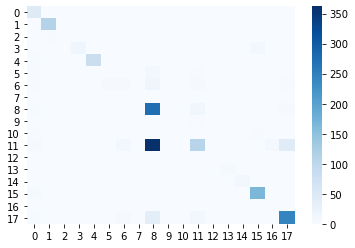

NB Time :  8.944333899999947


C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-42-a77ccd09cd4d>:189: RuntimeWarning: invalid value encountered in true_divide
  print("MLP Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))


Confusion Matrix MLP : 
 [[ 41   0   0   2   0   0   0   0   0   0   0   0   0   0   3   0   0   0
    0]
 [  0 110   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0]
 [  0   0   0   1   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0  28   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   3  84   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   1   0   1   0   0   0   0   1   0   0  10   0   1   0   1   0   0
    0]
 [  0   0   0   0   0   2   8   0   6   0   0  17   0   0   0   0   0   0
    2]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0]
 [  1   0   0   0   0   0   1   0 230   0   0  66   0   0   1   0   0   0
    2]
 [  0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  2   0   0   2   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0]
 [  0   1   0   0  14   0   6   0  96   0   0 388   0   0   0   0   0   0
   34]
 [ 

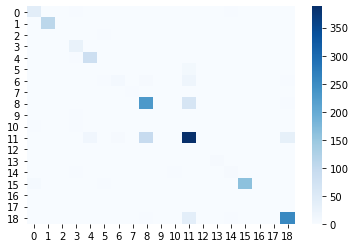

MLP Time :  82.9226334


C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix KNN : 
 [[ 30   0   0   0   0   0   2   0   0   0   0   0   0  10   0   4   0   0]
 [  0 106   1   0   0   1   0   0   0   0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   2   0   0]
 [  0   0   0  28   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  87   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   3   0   0   8   0   2   0   0   0   0]
 [  0   0   0   0   0   0   7   0  10   0   0  17   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0 192   0   0 102   0   3   0   0   0   3]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   7   0  37   0   0 476   0   1   0   0   0  17]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]


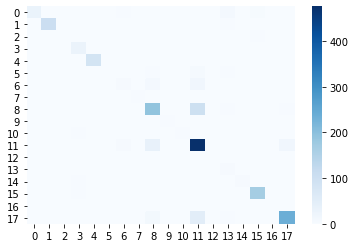

KNN Time :  2.746976399999994


C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix RF : 
 [[ 46   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 111   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0  28   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0  84   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   1   0   0   0   0   3   0   0   9   0   1   0   0   0   0]
 [  0   0   0   0   0   1   9   0   8   0   0  16   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 204   0   0  95   0   1   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0]
 [  1   0   0   2   0   0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0  29   0   0 482   0   0   0   0   0  27]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 

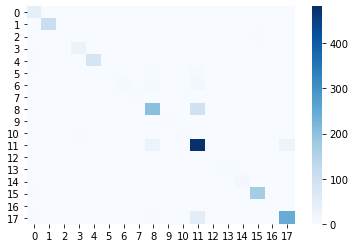

RF Time :  14.222074699999894


C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix LR : 
 [[ 41   0   0   0   0   0   2   0   0   0   0   3   0   0   0   0   0   0]
 [  0 111   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  28   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0  84   0   0   0   0   0   0   2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   2   0   3   0   0   8   0   0   0   1   0   0]
 [  0   0   0   0   0   1  10   0   5   0   0  18   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0 203   0   0  95   0   1   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0   2   1   0   0   0   0   0   0]
 [  0   1   0   0   0   0   2   0  34   0   0 474   0   0   0   0   0  28]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 

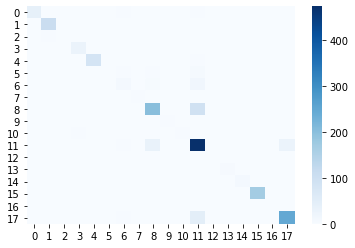

LR Time :  11.384519299999965


C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-42-a77ccd09cd4d>:353: RuntimeWarning: invalid value encountered in true_divide
  print("DT Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))


Confusion Matrix DT : 
 [[ 37   0   0   0   0   2   0   0   0   0   0   0   0   0   3   0   4   0
    0]
 [  0 111   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0  24   4   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  1   0   0   0   0  85   0   0   0   0   0   1   0   0   0   0   0   0
    0]
 [  0   0   0   1   0   0   0   2   0   2   0   0   9   0   1   0   0   0
    0]
 [  0   0   0   0   0   0   0  11   0   6   0   0  16   0   0   0   0   0
    2]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   7   0 191   0   0  99   0   0   0   0   0
    4]
 [  0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0
    0]
 [  1   0   0   2   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    0]
 [  

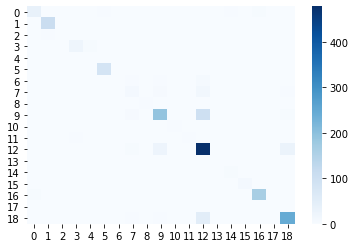

DT Time :  1.7367669000000205


C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix SVM : 
 [[ 46   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 111   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  28   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0  85   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   1   0   1   0   0   2   0   0   8   0   2   0   0   0   0]
 [  0   0   0   0   0   1  13   0   1   0   0  18   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   6   0 196   0   0  97   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0   1   0   0   0   1  15   0  27   0   0 465   0   0   1   0   0  29]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]


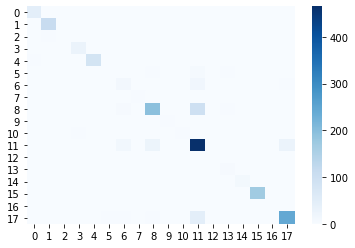

SVM Time :  47.2066506000001


In [57]:
import timeit

start = timeit.default_timer()
gauu_nb_return = gaus_nb_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("NB Time : ", stop - start) 

start = timeit.default_timer()
mlp_return = mlp_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("MLP Time : ", stop - start) 

start = timeit.default_timer()
knn_return = knn_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("KNN Time : ", stop - start) 

start = timeit.default_timer()
rf_return = rf_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("RF Time : ", stop - start) 

start = timeit.default_timer()
lr_return = lr_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("LR Time : ", stop - start) 

start = timeit.default_timer()
dt_return = fun_decision_tree(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("DT Time : ", stop - start) 

start = timeit.default_timer()
svm_return = svm_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("SVM Time : ", stop - start) 

gauu_nb_table.append(gauu_nb_return)
mlp_table.append(mlp_return)
knn_table.append(knn_return)
rf_table.append(rf_return)
lr_table.append(lr_return)
dt_table.append(dt_return)
svm_table.append(svm_return)
     
svm_table_final = DataFrame(svm_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
gauu_nb_table_final = DataFrame(gauu_nb_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
mlp_table_final = DataFrame(mlp_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
knn_table_final = DataFrame(knn_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
rf_table_final = DataFrame(rf_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
lr_table_final = DataFrame(lr_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

dt_table_final = DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])


In [58]:
#taking average of all k-fold performance values
final_mean_mat = []

final_mean_mat.append(np.transpose((list(svm_table_final.mean()))))
final_mean_mat.append(np.transpose((list(gauu_nb_table_final.mean()))))
final_mean_mat.append(np.transpose((list(mlp_table_final.mean()))))
final_mean_mat.append(np.transpose((list(knn_table_final.mean()))))
final_mean_mat.append(np.transpose((list(rf_table_final.mean()))))
final_mean_mat.append(np.transpose((list(lr_table_final.mean()))))
final_mean_mat.append(np.transpose((list(dt_table_final.mean()))))

final_avg_mat = DataFrame(final_mean_mat,columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"], 
                          index=["SVM","NB","MLP","KNN","RF","LR","DT"])

final_avg_mat

,Accuracy,Precision,Recall,F1 (weighted),F1 (Macro),F1 (Micro),ROC AUC
SVM,0.830336,0.834954,0.830336,0.826852,0.700464,0.830336,0.845312
NB,0.645683,0.731350,0.645683,0.614847,0.535281,0.645683,0.753995
MLP,0.791966,0.785237,0.791966,0.786080,0.507438,0.791966,0.770383
KNN,0.811151,0.821540,0.811151,0.807014,0.621767,0.811151,0.809542
RF,0.840528,0.843595,0.840528,0.832292,0.687022,0.840528,0.829211
LR,0.835132,0.833846,0.835132,0.828801,0.695335,0.835132,0.833556
DT,0.821942,0.822650,0.821942,0.816254,0.627702,0.821942,0.821930
